# jm_pandas test

## TO-DO
- OJO con los annotates de % si van arriba o abajo 
- Ver el Offset en cada caso si es positive or negative..??

In [1]:
## Standard Libs
from typing import Union, Optional, Tuple, Literal, Any
import warnings
import random

# Third-Party Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# # Local Libs
# from jm_datascience import jm_pandas as jm_pd
# from jm_datascience import jm_pdaccessor as jm
# from jm_utils import jm_richprt as jm_prt


## Some Series and DFs

In [2]:
df_work = pd.DataFrame({
    'nombre': ['Ana', 'Bob', '', 'Carlos', ' ', 'Diana'],
    'apellido': ['A_Ana', 'B_Bob', None, 'C_Carlos', None, 'D_Diana'],
    'edad': [25, -1, 30, 999, 28, 22],
    'ciudad': ['Madrid', 'N/A', 'Barcelona', 'Valencia', 'unknown', 'Sevilla'],
    'salario': [50000, 0, 60000, -999, 55000, 48000]
})

## Read spreedsheet for tests
try:
    spreedsheet = r"C:\Users\jm\Documents\__Dev\PortableGit\__localrepos\365DS_jm\3_statistics\2_13_Practical_Ex_Descriptive_Stats.xlsx"    # Casa
    with open(spreedsheet) as f:
        pass
except FileNotFoundError:
    spreedsheet = r"D:\git\PortableGit\__localrepos\365DS_jm\3_statistics\2_13_Practical_Ex_Descriptive_Stats.xlsx"                         # Office

df_xls = pd.read_excel(spreedsheet, skiprows=4, usecols='B:J,L:AA', index_col='ID')
df = df_xls.copy()

lst_str = random.choices([chr(i) for i in range(65, 72)], k=175)
# sr_str = jm_pd.to_series(lst_str)                         # <- jm_pd.to_serie_with_count()

In [3]:
def _fmt_value_for_pd(value, width=8, decimals=2, miles=',') -> str:
    """
    Format a value (numeric or string) into a right-aligned string of fixed width.

    Converts numeric values to formatted strings with thousands separators and
    specified decimal places. Strings are padded to the same width for consistent alignment.

    Parameters:
        value (int, float, str): The value to be formatted.
        width (int): Total width of the output string. Must be a positive integer.
        decimals (int): Number of decimal places for numeric values. Must be >= 0.
        miles (str or None): Thousands separator. Valid options: ',', '_', or None.

    Returns:
        str: The formatted string with right alignment.

    Raises:
        ValueError: If width <= 0, decimals < 0, or miles is invalid.

    Examples:
        >>> format_value(123456.789)
        '123,456.79'
        >>> format_value("text", width=10)
        '      text'
        >>> format_value(9876, miles=None)
        '    9876.00'
    """
    # Parameter Value validation <- vamos a tener que analizar este tema por si es un list , etc,,
    #   - En realidad acá tenemos que evaluar algo similar a jm_utils - fmt_values() FUTURE
    # if not isinstance(value, (int, float, np.integer, np.floating)) or pd.api.types.is_any_real_numeric_dtype(value)

    if not isinstance(width, int) or width <= 0:
        raise ValueError(f"Width must be a positive integer. Not '{width}'")
    
    if not isinstance(decimals, int) or decimals < 0:
        raise ValueError(f"Decimals must be a non-negative integer. Not '{decimals}")
    
    if miles not in [',', '_', None]:
        raise ValueError(f"Miles must be either ',', '_', or None. Not '{miles}")
    
    try:
        num = float(value)                                  # Convert to float if possible
        if num % 1 == 0:                                    # it its a total integer number
            decimals = 0
        if miles:
            return f"{num:>{width}{miles}.{decimals}f}"     # Ancho fijo, x decimales, alineado a la derecha
        else:
            return f"{num:>{width}.{decimals}f}"
        
    except (ValueError, TypeError):
        return str(value).rjust(width)                      # Alinea también strings, para mantener la grilla

In [4]:
def get_colorblind_palette_list():
    """
    Retorna una lista de colores (hexadecimales) amigables para personas
    con daltonismo, equivalentes a sns.color_palette('colorblind').
    """
    return [
        '#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC',
        '#CA9161', '#FBAFE4', '#949494', '#ECE133', '#56B4E9',
        '#5D8C3B', '#A93967', '#888888', '#FFC107', '#7C9680',
        '#E377C2', '#BCBD22', '#AEC7E8', '#FFBB78', '#98DF8A',
        '#FF9896', '#C5B0D5', '#C49C94', '#F7B6D2', '#DBDB8D',
        '#9EDAE5', '#D68E3A', '#A65898', '#B2707D', '#8E6C87'
    ]


def get_colors_list(palette: str, n: Optional[int] = 10) -> list[str]:
    '''
    Return a valid matplotlib palette list
    - 'colorbind' <- daltonic, 'viridis', 'plasma', 'inferno', 'magma', 'cividis' <- daltonic, set3, set2
    - 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
    'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 
    'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
    'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 
    'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
    'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 
    'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
    'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r',
    'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 
    'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 
    'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 
    'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 
    'twilight_shifted', 'twilight_shifted_r', 'vanimo', 'vanimo_r', 'viridis', 'viridis_r', 'winter', 'winter_r'",
    '''
    if n < 6:       # To get a softer range of colors if n is too small           
        n = 6

    if palette == 'colorblind':
        colors_list = get_colorblind_palette_list()
    elif palette == 'set2':
        colors_list = plt.cm.Set2(np.linspace(0, 1, n))
    elif palette == 'set3':
        colors_list = plt.cm.Set3(np.linspace(0, 1, n))
    else:
        cmap = plt.get_cmap(palette, n)              # Use palette colormap
        colors_list = [cmap(i) for i in range(n)]    # Get colors from the colormap

    return colors_list


In [5]:
def to_series(
    data: Union[pd.Series, np.ndarray, dict, list, set, pd.DataFrame],
    index: Optional[pd.Index] = None,
    name: Optional[str] = None
) -> pd.Series:
    """
    Converts input data into a pandas Series, optionally returning value counts.

    This function accepts various data types and converts them into a pandas Series.
    If `count=True`, it returns the frequency count of the values in the resulting Series.

    Parameters:
        data (Union[pd.Series, np.ndarray, dict, list, set, pd.DataFrame]):
            The input data to convert. Supported types include:
            - pd.Series: returned as-is or counted if `count=True`.
            - np.ndarray: flattened and converted to a Series.
            - dict: keys become the index, values are used for data.
            - list or set: converted directly to a Series.
            - pd.DataFrame:
                - 1 column: converted directly to a Series.
                - 2 columns: first column becomes the index, second becomes the values.

        count (bool or int, optional): Whether to return value counts instead of raw data.
            If True or 1, returns frequencies of each value. Default is False.

    Returns:
        pd.Series: A pandas Series representing the input data. If `count=True`, returns
            the value counts of the data.

    Raises:
        TypeError: If `data` is not one of the supported types.
        ValueError: If `count` is not a boolean or integer 0/1.
        ValueError: If DataFrame has more than 2 columns.

    Examples:
        >>> import pandas as pd
        >>> to_serie_with_count([1, 2, 2, 3])
        0    1
        1    2
        2    2
        3    3
        dtype: int64

        >>> to_serie_with_count([1, 2, 2, 3], count=True)
        2    2
        1    1
        3    1
        dtype: int64

        >>> df = pd.DataFrame({'Category': ['A', 'B', 'A'], 'Value': [10, 20, 30]})
        >>> to_serie_with_count(df)
        Category
        A    10
        B    20
        A    30
        Name: Value, dtype: int64
    """
    
    # Validate parameters - FUTURE
    
    if isinstance(data, pd.Series):                 # If series is already a Series no conversion needed
        series = data                                  
    elif isinstance(data, np.ndarray):              # If data is a NumPy array   
        series = pd.Series(data.flatten())
    elif isinstance(data, (dict, list)):
        series = pd.Series(data)
    elif isinstance(data, (set)):
        series = pd.Series(tuple(data))
    elif isinstance(data, pd.DataFrame):
        if data.shape[1] == 1:                      # Also len(data.columns == 1)
            series = data.iloc[:, 0]
        elif data.shape[1] == 2:                    # Index: first col, Data: 2nd Col
            series = data.set_index(data.columns[0])[data.columns[1]]
        else:
            raise ValueError("DataFrame must have 1 oer 2 columns. Categories and values for 2 columns cases.")
    else:
        raise TypeError(f"Unsupported data type: {type(data)}. "
                    "Supported types: pd.Series, np.ndarray, pd.DataFrame, dict, list, set, and pd.DataFrame")

    if name:
        series.name = name

    if index:
        series.index = index

    return series

In [6]:
def get_fdt(
        data: Union[pd.Series, np.ndarray, dict, list, pd.DataFrame],
        value_counts: Optional[bool] = False,
        dropna: Optional[bool] = True,
        pcts: Optional[bool] = True,
        plain_relatives: Optional[bool] = True,
        fmt_values: Optional[bool] = False,
        sort: Optional[str] = 'desc',
        nans: Optional[str] = 'drop'
) -> pd.DataFrame:
    '''
    Generata a Frequency Distribution Table (fdt)

    data: puede ser ya con el value_counts() hecho o no
    sort: 'desc', 'asc', 'ix_asc', 'ix_desc', para como queremos que sea vea el orden por valores o por indice
    nans: 'drop', 'last', 'sort'
    '''
    columns = [
        'Frequency',
        'Cumulative Frequency',
        'Relative Frequency',
        'Cumulative Relative Freq.',
        'Relative Freq. [%]',
        'Cumulative Freq. [%]'
    ]
    
    sr = to_series(data)

    if value_counts:
        sr = sr.value_counts(dropna=dropna)

    fdt = pd.DataFrame(sr)
    fdt.columns = [columns[0]]
    fdt[columns[1]] = fdt['Frequency'].cumsum()
    fdt[columns[2]] = fdt['Frequency'] / fdt['Frequency'].sum()
    fdt[columns[3]] = fdt['Relative Frequency'].cumsum()
    fdt[columns[4]] = fdt['Relative Frequency'] * 100
    fdt[columns[5]] = fdt['Cumulative Relative Freq.'] * 100

    if not pcts:                    # Don't return percentage columns
        fdt = fdt[columns[0:4]]
    
    if not plain_relatives:         # Don't return relative and plain cumulative
        fdt = fdt[[columns[0], columns[4], columns[5]]]

    if fmt_values:
        fdt = fdt.map(_fmt_value_for_pd)
        
    match sort:
        case 'asc':
            return fdt.sort_values(by=columns[0])
        case 'ix_asc':
            return fdt.sort_index()
        case 'ix_desc':
            return fdt.sort_index(ascending=False)
        case _:
            return fdt

In [7]:
def plt_pareto5(
    data: Union[pd.Series, pd.DataFrame],
    value_counts=False,
    scale: Optional[int] = 2,
    title: Optional[str] = 'Pareto Chart',
    x_label: Optional[str] = None,
    y1_label: Optional[str] = None,
    y2_label: Optional[str] = None,
    palette: Optional[list] = None,
    color1: Optional[str] = 'midnightblue',
    color2: Optional[str] = 'darkorange',
    pct_decimals: Optional[int] = 1,
    label_rotate: Optional[float] = 45,
    figsize: Optional[tuple] = None,
    fig_margin: Optional[float] = 1.1,
    show_grid: Optional[bool] = True,
    bars_alpha: Optional[float] = 0.8,
    reference_pct: Optional[float] = 80,
    reference_linewidth: float = 1,
    reference_color: str = 'red',
    reference_alpha: Optional[float] = 0.6,
    show_reference_lines: bool = True,
    scaled_cumulative: bool = False,
) -> tuple[plt.Figure, tuple[plt.Axes, plt.Axes]]:

    # Convert to serie en case of DF
    if isinstance(data, pd.DataFrame):
        data = to_series(data)

    # Validate data parameter a pandas object
    if not isinstance(data, (pd.Series, pd.DataFrame)):
        raise TypeError(
            f"Input data must be a pandas Series or DataFrame. Got {type(data)} instead."
        )
    
    # Validate and process scale parameter
    if not (1 <= scale <= 9):
        raise ValueError(f"Invalid 'scale' value. Must be between 1 and 9, got {scale}.")
    
    scale = round(scale)
    
    # Validate reference percentage
    if reference_pct is not None and not (0 < reference_pct <= 100):
        raise ValueError(f"reference_pct must be between 0 and 100, got {reference_pct}")
    
    # Validate reference linewidth
    if reference_linewidth < 0:
        raise ValueError(f"reference_linewidth must be non-negative, got {reference_linewidth}")

    # Before getting the Frequency Distribution Table get the nulls
    nulls = data.isna().sum()

    # Get de fdt
    fdt = get_fdt(data, value_counts=value_counts, plain_relatives=False)

    # Calculate figure dimensions
    if figsize is None:
        multiplier = 1.33333334 ** scale
        w_base, h_base = 4.45, 2.25
        width, height = w_base * multiplier, h_base * multiplier
        figsize = (width, height)
    else:
        width, height = figsize
    
    # Calculate font sizes based on figure width
    bar_label_size = width
    axis_label_size = width * 1.25
    title_size = width * 1.57

    # Calculate cumulative_line sizes
    markersize = width * 0.3
    linewidth = width * 0.1

    # Set up colors
    if palette:
        color_palette = get_colors_list(palette, fdt.shape[0])
        color1 = color_palette[0]                                   # In this case don't consider color1 parameter
    else:
        color_palette = color1

    # Create figure and primary axis
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
    
    # Create bar plot
    bars = ax.bar(fdt.index, fdt.iloc[:, 0], 
                  color=color_palette,
                  width=0.95, 
                  alpha=bars_alpha,
                  edgecolor='white', 
                  linewidth=0.5)

    # Add value labels on bars
    ax.bar_label(bars,
                fontsize=bar_label_size,
                fontweight='bold',
                color=color1,
                label_type='edge',  # Etiqueta fuera de la barra
                padding=2)          #, rotation=90)  # opcional

    # Create secondary y-axis for cumulative percentage
    ax2 = ax.twinx()        # create another y-axis sharing a common x-axis
    
    # Calculate cumulative values
    cumulative_percentages = fdt.iloc[:, -1]            # Last column: ['Cumulative Freq. [%]']
    
    if scaled_cumulative:                               # Scaling mode fixed
        total_sum = fdt.iloc[:, 0].sum()
        
        # Convert cumulative percentages to scaled heightsdas
        scaled_values = (cumulative_percentages / 100) * total_sum
        
        # Draw the scaled line on the main axis (x=index, y=scaled_values)
        line = ax.plot(fdt.index, scaled_values,
                       color=color2,
                       marker="D",
                       markersize=markersize,
                       linewidth=linewidth,
                       markeredgecolor='white',
                       markeredgewidth=0.2)
        
        # Adjust main axis limits to include the line
        max_freq = fdt.iloc[:, 0].max()
        max_scaled = scaled_values.max()
        # Use the maximum between the bars and the scaled line, with margin
        ax.set_ylim(0, max(max_freq, max_scaled) * fig_margin)
        
        # CORRECCIÓN: Configurar ax2 para que coincida con la escala del eje principal
        ax2.set_ylim(0, max(max_freq, max_scaled) * fig_margin)
        
        # Create custom stickers for ax2 that show percentages, corresponding to the climbed heights
        ax2_ticks = []
        ax2_labels = []
        for pct in [0, 20, 40, 60, 80, 100]:
            scaled_tick = (pct / 100) * total_sum
            if scaled_tick <= max(max_freq, max_scaled) * fig_margin:
                ax2_ticks.append(scaled_tick)
                ax2_labels.append(f'{pct}%')
        
        ax2.set_yticks(ax2_ticks)
        ax2.set_yticklabels(ax2_labels)
        
        # % point labels
        formatted_weights = [f'{x:.{pct_decimals}f}%' for x in cumulative_percentages]
        for i, txt in enumerate(formatted_weights):
            if i == 0:              # To change only % annotate of the first bar         
                distance = 0.08     # first % annotate, away from the bar
            else:
                distance = 0.025    # The others % annotates, not so far
            ax.annotate(txt,
                       (fdt.index[i], scaled_values.iloc[i] + (max(max_freq, max_scaled) * distance)),
                       color=color2,
                       fontsize=bar_label_size,
                       ha='center')
        
        # Reference lines in scaled mode
        if show_reference_lines and reference_pct is not None:
            reference_scaled_height = (reference_pct / 100) * total_sum
            
            # AXHLINE and its text
            ax.axhline(y=reference_scaled_height, color=reference_color, linestyle='--', 
                      alpha=reference_alpha, linewidth=reference_linewidth)
            
            ax.text(0.01, reference_scaled_height + (max(max_freq, max_scaled) * 0.02), 
                   f'{reference_pct}%', 
                   transform=ax.get_yaxis_transform(), 
                   color=reference_color, fontsize=bar_label_size*0.8)
            
            # AXVLINE
            cumulative_values = cumulative_percentages.values
            x_reference_percent = None
            for i, cum_pct in enumerate(cumulative_values):
                if cum_pct >= reference_pct:
                    if i == 0:
                        x_reference_percent = 0
                    else:
                        prev_pct = cumulative_values[i-1]
                        curr_pct = cumulative_values[i]
                        x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                    break
            
            if x_reference_percent is not None:
                ax.axvline(x=x_reference_percent, color=reference_color, linestyle='--', 
                          alpha=reference_alpha, linewidth=reference_linewidth)
                
                ax.text(x_reference_percent + 0.1, 
                       reference_scaled_height - (max(max_freq, max_scaled) * 0.1), 
                       f'{reference_pct}% threshold', 
                       rotation=90, color=reference_color, fontsize=bar_label_size*0.8, 
                       ha='left', va='center')
    
    else:                                           # Native scaling
        ax2.set_ylim(0, 100 * fig_margin)
        
        line = ax2.plot(fdt.index, cumulative_percentages,
                        color=color2,
                        marker="D",
                        markersize=markersize,
                        linewidth=linewidth,
                        markeredgecolor='white',
                        markeredgewidth=0.2)
        
        ax2.yaxis.set_major_formatter(PercentFormatter())

        formatted_weights = [f'{x:.{pct_decimals}f}%' for x in cumulative_percentages]  
        for i, txt in enumerate(formatted_weights):
                ax2.annotate(txt,
                            (fdt.index[i], cumulative_percentages.iloc[i] - 6),
                            color=color2,
                            fontsize=bar_label_size,
                            ha='center')
        
        if show_reference_lines and reference_pct is not None:
            ax2.axhline(y=reference_pct, color=reference_color, linestyle='--', 
                       alpha=reference_alpha, linewidth=reference_linewidth)
            
            ax2.text(0.01, reference_pct + 3, f'{reference_pct}%', 
                        transform=ax2.get_yaxis_transform(), 
                        color=reference_color, fontsize=bar_label_size*0.8)
            
            cumulative_values = cumulative_percentages.values
            x_reference_percent = None
            for i, cum_pct in enumerate(cumulative_values):
                if cum_pct >= reference_pct:
                    if i == 0:
                        x_reference_percent = 0
                    else:
                        prev_pct = cumulative_values[i-1]
                        curr_pct = cumulative_values[i]
                        x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                    break
            
            if x_reference_percent is not None:
                ax2.axvline(x=x_reference_percent, color=reference_color, linestyle='--', 
                           alpha=reference_alpha, linewidth=reference_linewidth)
                
                ax2.text(x_reference_percent + 0.1, reference_pct - 30, 
                         f'{reference_pct}% threshold', 
                         rotation=90, color=reference_color, fontsize=bar_label_size*0.8, 
                        ha='left', va='center')

    # Configure tick parameters
    ax.tick_params(axis='y', colors=color1, labelsize=bar_label_size)
    ax.tick_params(axis='x', rotation=label_rotate, labelsize=bar_label_size)
    ax2.tick_params(axis='y', colors=color2, labelsize=bar_label_size)

    # Set y-axis limits (solo para modo original)
    if not scaled_cumulative:
        max_freq = fdt.iloc[:, 0].max()
        ax.set_ylim(0, max_freq * fig_margin)

    # Add grid if requested
    if show_grid:
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)

    # Set title and labels
    if not x_label:
         x_label = fdt.index.name
    
    if not y1_label:
         y1_label = fdt.columns[0]

    if not y2_label:
         y2_label = fdt.columns[-1]

    # Apply title and labels
    fig.suptitle(title, fontsize=title_size, fontweight='bold')
    ax.set_title(f" - Nulls: {nulls} -", fontsize=axis_label_size*0.8, color=color1)
    ax.set_xlabel(x_label, fontsize=axis_label_size)
    ax.set_ylabel(y1_label, fontsize=axis_label_size, color=color1)
    ax2.set_ylabel(y2_label, fontsize=axis_label_size, color=color2)

    return fig, (ax, ax2)

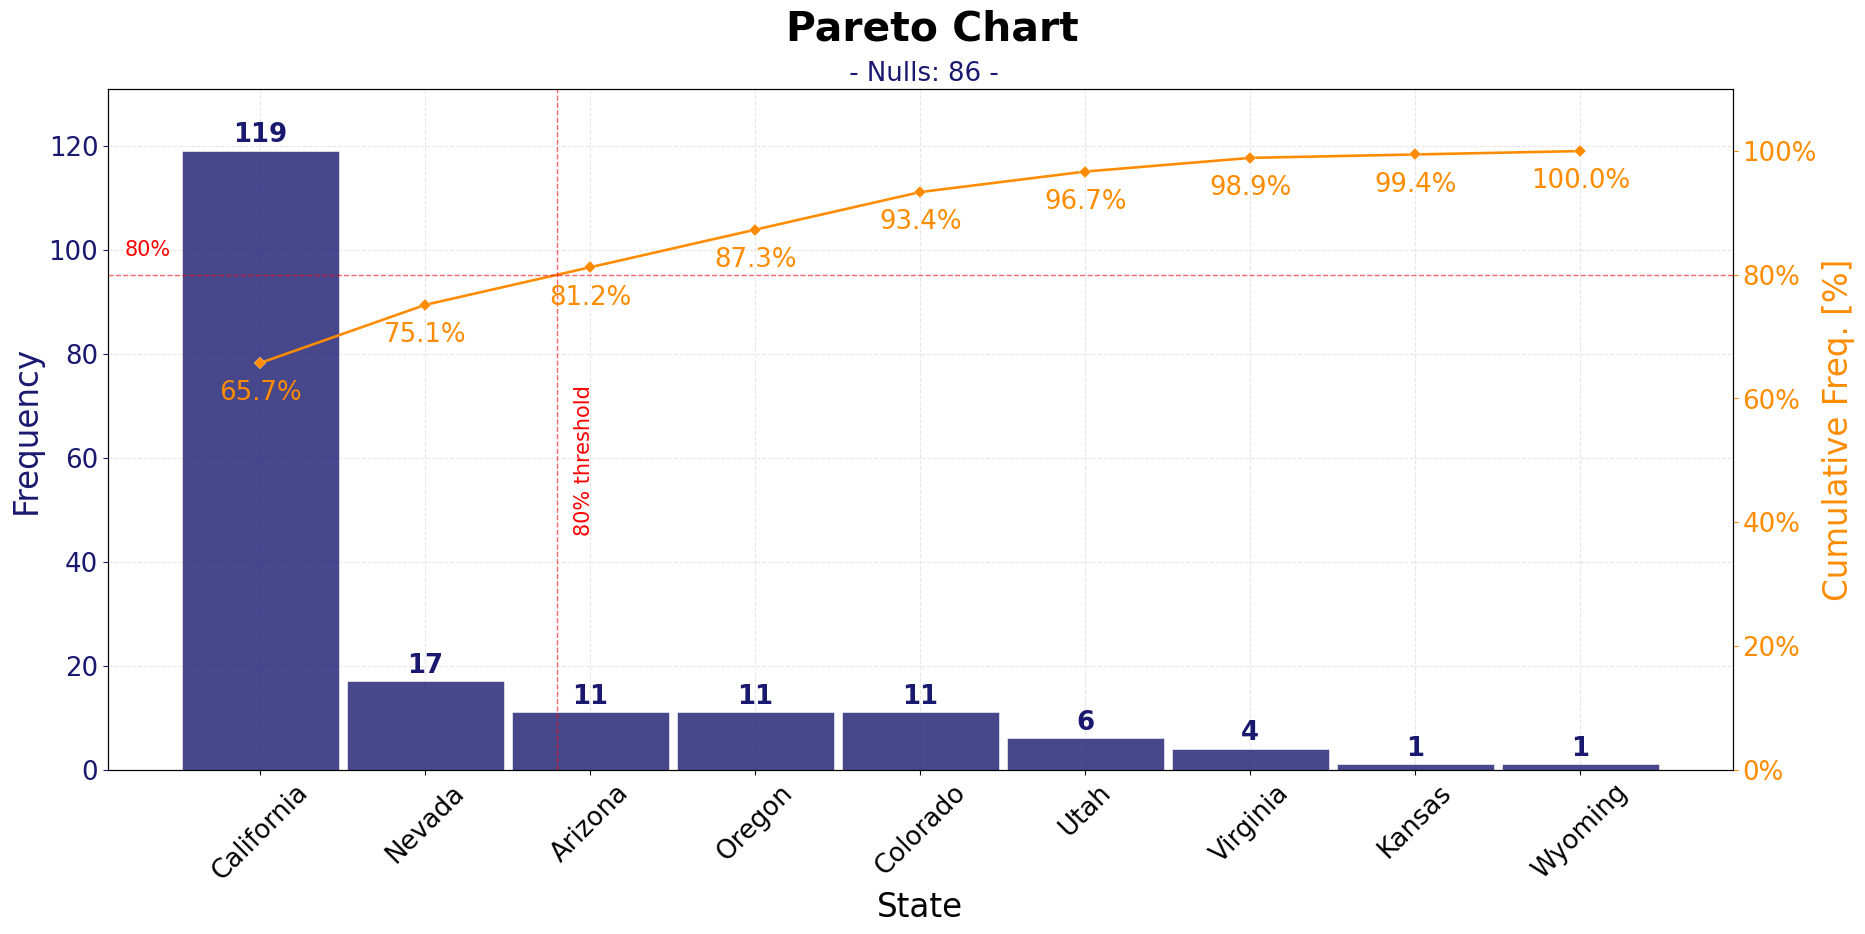

In [8]:
fig = plt_pareto5(df['State'], value_counts=True, scale=5, scaled_cumulative=False)

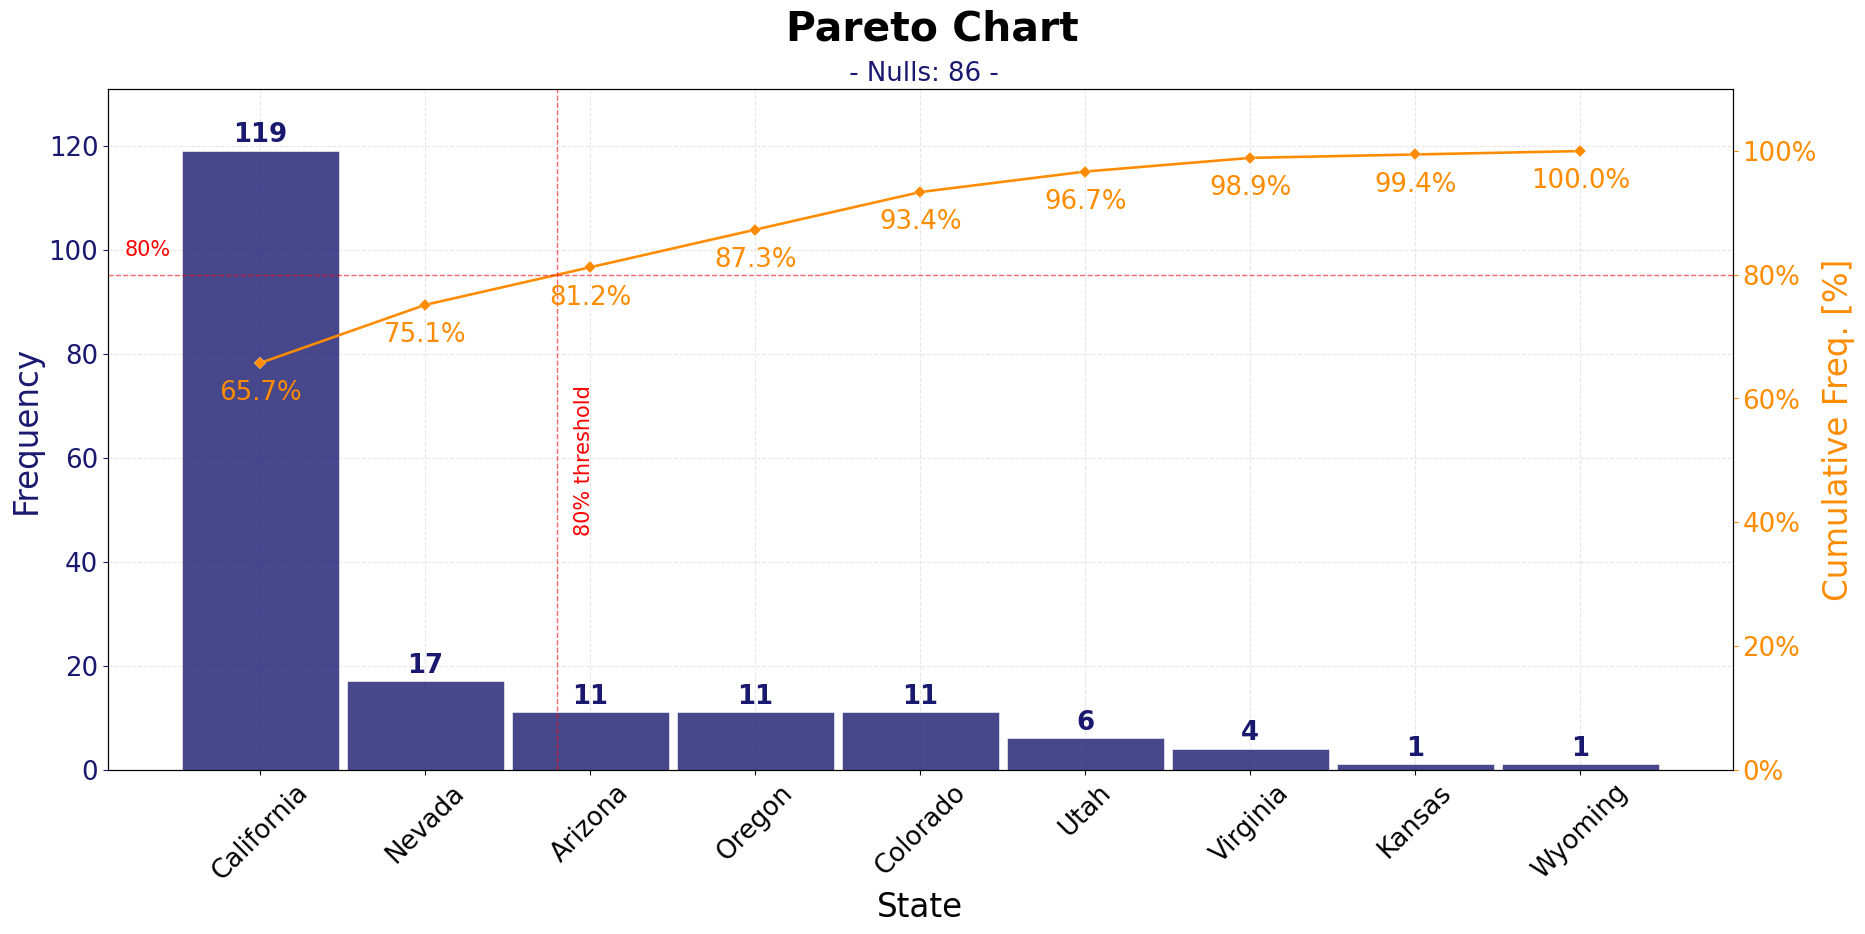

In [9]:
fig = plt_pareto5(df['State'], value_counts=True, scale=5)

In [10]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from typing import Union, Optional, Tuple
# from matplotlib.ticker import PercentFormatter


def sns_pareto(
    data: Union[pd.Series, pd.DataFrame],
    value_counts=False,
    scale: Optional[int] = 2,
    title: Optional[str] = 'Pareto Chart',
    x_label: Optional[str] = None,
    y1_label: Optional[str] = None,
    y2_label: Optional[str] = None,
    palette: Optional[str] = None,
    color1: Optional[str] = 'midnightblue',
    color2: Optional[str] = 'darkorange',
    pct_decimals: Optional[int] = 1,
    label_rotate: Optional[float] = 45,
    figsize: Optional[tuple] = None,
    fig_margin: Optional[float] = 1.1,
    show_grid: Optional[bool] = True,
    bars_alpha: Optional[float] = 0.8,
    reference_pct: Optional[float] = 80,
    reference_linewidth: float = 1,
    reference_color: str = 'red',
    reference_alpha: Optional[float] = 0.6,
    show_reference_lines: bool = True,
    scaled_cumulative: bool = False,
) -> Tuple[plt.Figure, Tuple[plt.Axes, plt.Axes]]:
    """
    Create a Pareto chart using Seaborn.
    
    A Pareto chart is a bar chart where the bars are ordered by frequency/value in descending order,
    with a cumulative percentage line overlaid.
    
    Parameters
    ----------
    data : Union[pd.Series, pd.DataFrame]
        Input data for the Pareto chart
    value_counts : bool, default False
        Whether to apply value_counts to the data
    scale : Optional[int], default 2
        Scale factor for figure sizing (1-9)
    title : Optional[str], default 'Pareto Chart'
        Chart title
    x_label : Optional[str], default None
        X-axis label
    y1_label : Optional[str], default None
        Primary y-axis label
    y2_label : Optional[str], default None
        Secondary y-axis label
    palette : Optional[str], default None
        Seaborn color palette name
    color1 : Optional[str], default 'midnightblue'
        Primary color for bars
    color2 : Optional[str], default 'darkorange'
        Secondary color for cumulative line
    pct_decimals : Optional[int], default 1
        Decimal places for percentage labels
    label_rotate : Optional[float], default 45
        Rotation angle for x-axis labels
    figsize : Optional[tuple], default None
        Figure size (width, height)
    fig_margin : Optional[float], default 1.1
        Margin multiplier for y-axis limits
    show_grid : Optional[bool], default True
        Whether to show grid
    bars_alpha : Optional[float], default 0.8
        Transparency for bars
    reference_pct : Optional[float], default 80
        Reference percentage for horizontal line
    reference_linewidth : float, default 1
        Line width for reference lines
    reference_color : str, default 'red'
        Color for reference lines
    reference_alpha : Optional[float], default 0.6
        Transparency for reference lines
    show_reference_lines : bool, default True
        Whether to show reference lines
    scaled_cumulative : bool, default False
        Whether to scale cumulative line to match bar heights
    
    Returns
    -------
    Tuple[plt.Figure, Tuple[plt.Axes, plt.Axes]]
        Figure and tuple of primary and secondary axes
    """
    
    # Convert to series if DataFrame
    if isinstance(data, pd.DataFrame):
        data = to_series(data)  # Assuming this function exists
    
    # Validate data parameter
    if not isinstance(data, (pd.Series, pd.DataFrame)):
        raise TypeError(
            f"Input data must be a pandas Series or DataFrame. Got {type(data)} instead."
        )
    
    # Validate and process scale parameter
    if not (1 <= scale <= 9):
        raise ValueError(f"Invalid 'scale' value. Must be between 1 and 9, got {scale}.")
    
    scale = round(scale)
    
    # Validate reference percentage
    if reference_pct is not None and not (0 < reference_pct <= 100):
        raise ValueError(f"reference_pct must be between 0 and 100, got {reference_pct}")
    
    # Validate reference linewidth
    if reference_linewidth < 0:
        raise ValueError(f"reference_linewidth must be non-negative, got {reference_linewidth}")
    
    # Count nulls before processing
    nulls = data.isna().sum()
    
    # Get frequency distribution table
    fdt = get_fdt(data, value_counts=value_counts, plain_relatives=False)  # Assuming this function exists
    
    # Calculate figure dimensions
    if figsize is None:
        multiplier = 1.33333334 ** scale
        w_base, h_base = 4.45, 2.25
        width, height = w_base * multiplier, h_base * multiplier
        figsize = (width, height)
    else:
        width, height = figsize
    
    # Calculate font sizes based on figure width
    bar_label_size = width
    axis_label_size = width * 1.25
    title_size = width * 1.57
    
    # Calculate line properties
    markersize = width * 0.3
    linewidth = width * 0.1
    
    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
    
    # Prepare data for plotting
    categories = fdt.index
    frequencies = fdt.iloc[:, 0]
    cumulative_percentages = fdt.iloc[:, -1]
    
    # Create bar plot using seaborn
    if palette:
        # Use seaborn palette
        colors = sns.color_palette(palette, len(categories))
    else:
        # Use single color
        colors = color1
    
    # Create the bar plot
    bars = sns.barplot(
        x=categories,
        y=frequencies,
        palette=colors if palette else None,
        color=None if palette else color1,
        alpha=bars_alpha,
        ax=ax,
        edgecolor='white',
        linewidth=0.5
    )
    
    # Add value labels on bars
    for i, bar in enumerate(bars.patches):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + (frequencies.max() * 0.01),
                f'{int(height)}',
                ha='center', va='bottom',
                fontsize=bar_label_size,
                fontweight='bold',
                color=color1)
    
    # Create secondary y-axis for cumulative percentage
    ax2 = ax.twinx()
    
    if scaled_cumulative:
        # Scaling mode - scale cumulative percentages to match bar heights
        total_sum = frequencies.sum()
        scaled_values = (cumulative_percentages / 100) * total_sum
        
        # Plot cumulative line on primary axis
        line_data = pd.DataFrame({
            'x': range(len(categories)),
            'y': scaled_values
        })
        
        sns.lineplot(
            data=line_data,
            x='x',
            y='y',
            color=color2,
            marker="D",
            markersize=markersize,
            linewidth=linewidth,
            markeredgecolor='white',
            markeredgewidth=0.2,
            ax=ax
        )
        
        # Adjust main axis limits
        max_freq = frequencies.max()
        max_scaled = scaled_values.max()
        ax.set_ylim(0, max(max_freq, max_scaled) * fig_margin)
        
        # Configure ax2 to match primary axis scale
        ax2.set_ylim(0, max(max_freq, max_scaled) * fig_margin)
        
        # Create custom ticks for ax2
        ax2_ticks = []
        ax2_labels = []
        for pct in [0, 20, 40, 60, 80, 100]:
            scaled_tick = (pct / 100) * total_sum
            if scaled_tick <= max(max_freq, max_scaled) * fig_margin:
                ax2_ticks.append(scaled_tick)
                ax2_labels.append(f'{pct}%')
        
        ax2.set_yticks(ax2_ticks)
        ax2.set_yticklabels(ax2_labels)
        
        # Add percentage labels
        for i, (cat, pct, scaled_val) in enumerate(zip(categories, cumulative_percentages, scaled_values)):
            distance = 0.08 if i == 0 else 0.025
            ax.text(i, scaled_val + (max(max_freq, max_scaled) * distance),
                   f'{pct:.{pct_decimals}f}%',
                   ha='center', va='bottom',
                   color=color2,
                   fontsize=bar_label_size)
        
        # Reference lines in scaled mode
        if show_reference_lines and reference_pct is not None:
            reference_scaled_height = (reference_pct / 100) * total_sum
            
            # Horizontal reference line
            ax.axhline(y=reference_scaled_height, color=reference_color, linestyle='--',
                      alpha=reference_alpha, linewidth=reference_linewidth)
            
            ax.text(0.01, reference_scaled_height + (max(max_freq, max_scaled) * 0.02),
                   f'{reference_pct}%',
                   transform=ax.get_yaxis_transform(),
                   color=reference_color, fontsize=bar_label_size*0.8)
            
            # Vertical reference line
            cumulative_values = cumulative_percentages.values
            x_reference_percent = None
            for i, cum_pct in enumerate(cumulative_values):
                if cum_pct >= reference_pct:
                    if i == 0:
                        x_reference_percent = 0
                    else:
                        prev_pct = cumulative_values[i-1]
                        curr_pct = cumulative_values[i]
                        x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                    break
            
            if x_reference_percent is not None:
                ax.axvline(x=x_reference_percent, color=reference_color, linestyle='--',
                          alpha=reference_alpha, linewidth=reference_linewidth)
                
                ax.text(x_reference_percent + 0.1,
                       reference_scaled_height - (max(max_freq, max_scaled) * 0.1),
                       f'{reference_pct}% threshold',
                       rotation=90, color=reference_color, fontsize=bar_label_size*0.8,
                       ha='left', va='center')
    
    else:
        # Native scaling mode
        ax2.set_ylim(0, 100 * fig_margin)
        
        # Plot cumulative line on secondary axis
        line_data = pd.DataFrame({
            'x': range(len(categories)),
            'y': cumulative_percentages
        })
        
        sns.lineplot(
            data=line_data,
            x='x',
            y='y',
            color=color2,
            marker="D",
            markersize=markersize,
            linewidth=linewidth,
            markeredgecolor='white',
            markeredgewidth=0.2,
            ax=ax2
        )
        
        ax2.yaxis.set_major_formatter(PercentFormatter())
        
        # Add percentage labels
        for i, (cat, pct) in enumerate(zip(categories, cumulative_percentages)):
            ax2.text(i, pct - 6,
                    f'{pct:.{pct_decimals}f}%',
                    ha='center', va='top',
                    color=color2,
                    fontsize=bar_label_size)
        
        # Reference lines in native mode
        if show_reference_lines and reference_pct is not None:
            ax2.axhline(y=reference_pct, color=reference_color, linestyle='--',
                       alpha=reference_alpha, linewidth=reference_linewidth)
            
            ax2.text(0.01, reference_pct + 3, f'{reference_pct}%',
                    transform=ax2.get_yaxis_transform(),
                    color=reference_color, fontsize=bar_label_size*0.8)
            
            # Vertical reference line
            cumulative_values = cumulative_percentages.values
            x_reference_percent = None
            for i, cum_pct in enumerate(cumulative_values):
                if cum_pct >= reference_pct:
                    if i == 0:
                        x_reference_percent = 0
                    else:
                        prev_pct = cumulative_values[i-1]
                        curr_pct = cumulative_values[i]
                        x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                    break
            
            if x_reference_percent is not None:
                ax2.axvline(x=x_reference_percent, color=reference_color, linestyle='--',
                           alpha=reference_alpha, linewidth=reference_linewidth)
                
                ax2.text(x_reference_percent + 0.1, reference_pct - 30,
                         f'{reference_pct}% threshold',
                         rotation=90, color=reference_color, fontsize=bar_label_size*0.8,
                         ha='left', va='center')
    
    # Configure tick parameters
    ax.tick_params(axis='y', colors=color1, labelsize=bar_label_size)
    ax.tick_params(axis='x', rotation=label_rotate, labelsize=bar_label_size)
    ax2.tick_params(axis='y', colors=color2, labelsize=bar_label_size)
    
    # Set y-axis limits for primary axis (only in native mode)
    if not scaled_cumulative:
        max_freq = frequencies.max()
        ax.set_ylim(0, max_freq * fig_margin)
    
    # Add grid if requested
    if show_grid:
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)
    
    # Set default labels if not provided
    if not x_label:
        x_label = fdt.index.name
    
    if not y1_label:
        y1_label = fdt.columns[0]
    
    if not y2_label:
        y2_label = fdt.columns[-1]
    
    # Apply title and labels
    fig.suptitle(title, fontsize=title_size, fontweight='bold')
    ax.set_title(f" - Nulls: {nulls} -", fontsize=axis_label_size*0.8, color=color1)
    ax.set_xlabel(x_label, fontsize=axis_label_size)
    ax.set_ylabel(y1_label, fontsize=axis_label_size, color=color1)
    ax2.set_ylabel(y2_label, fontsize=axis_label_size, color=color2)
    
    # Remove seaborn's default spines styling to match original
    sns.despine(ax=ax, right=False)
    
    return fig, (ax, ax2)

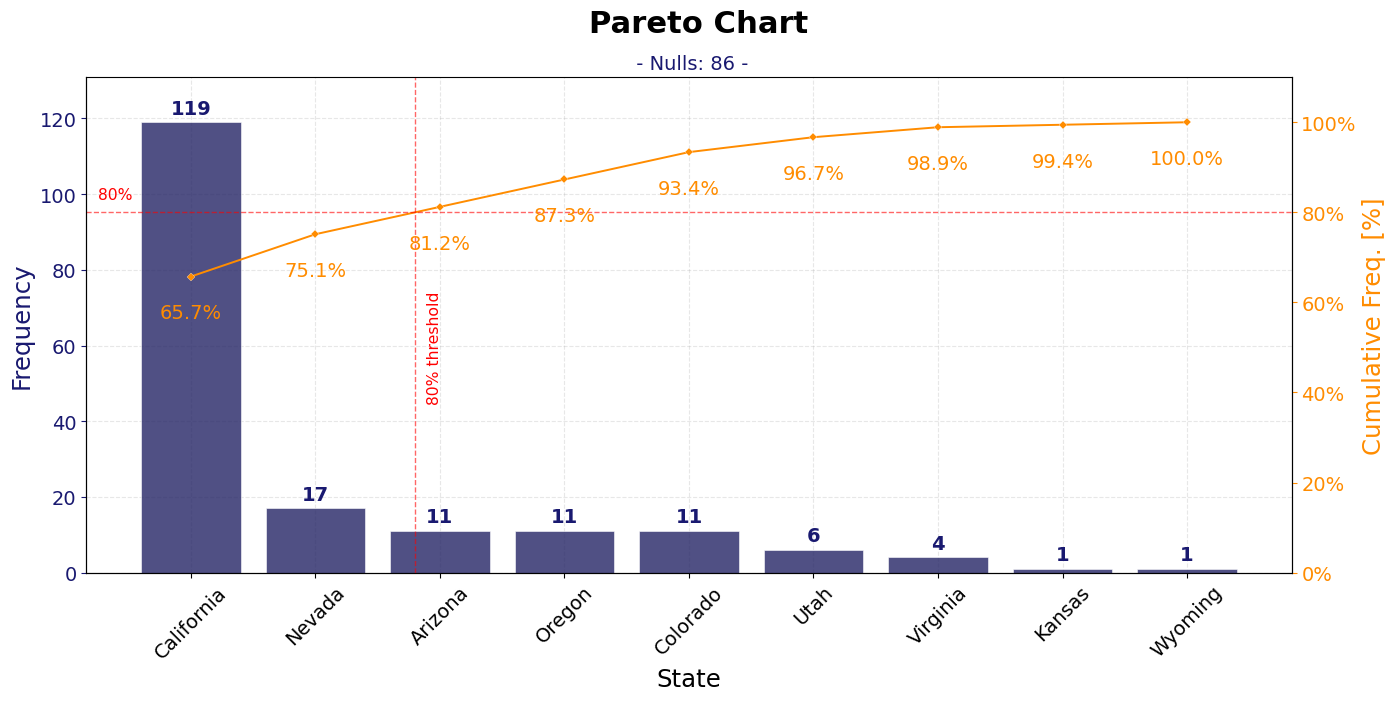

In [11]:
fig = sns_pareto(df['State'], value_counts=True, scale=4)

In [12]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# from typing import Union, Optional, Tuple, Literal
# from matplotlib.ticker import PercentFormatter
# import warnings

## Claude

def sns_pareto2(
    data: Union[pd.Series, pd.DataFrame],
    value_counts: bool = False,
    scale: Optional[int] = 2,
    title: Optional[str] = 'Pareto Chart',
    x_label: Optional[str] = None,
    y1_label: Optional[str] = None,
    y2_label: Optional[str] = None,
    palette: Optional[str] = 'husl',
    palette_type: Literal['qualitative', 'sequential', 'diverging'] = 'qualitative',
    color1: Optional[str] = 'steelblue',
    color2: Optional[str] = 'coral',
    theme: Optional[str] = 'whitegrid',
    context: Literal['paper', 'notebook', 'talk', 'poster'] = 'notebook',
    pct_decimals: Optional[int] = 1,
    label_rotate: Optional[float] = 45,
    figsize: Optional[tuple] = None,
    fig_margin: Optional[float] = 1.15,
    show_grid: Optional[bool] = True,
    grid_alpha: Optional[float] = 0.3,
    bars_alpha: Optional[float] = 0.85,
    reference_pct: Optional[float] = 80,
    reference_linewidth: float = 2,
    reference_color: str = 'crimson',
    reference_alpha: Optional[float] = 0.8,
    show_reference_lines: bool = True,
    scaled_cumulative: bool = False,
    annotation_style: Literal['outside', 'inside', 'edge'] = 'outside',
    show_confidence_interval: bool = False,
    confidence_level: float = 0.95,
    bar_edge_color: str = 'white',
    bar_edge_width: float = 0.8,
    rounded_bars: bool = True,
    sorting: Literal['frequency', 'alphabetical', 'custom'] = 'frequency',
    custom_order: Optional[list] = None,
    show_statistics: bool = True,
    modern_styling: bool = True,
    line_style: Literal['solid', 'dashed', 'dotted'] = 'solid',
    marker_style: str = 'o',
    gradient_bars: bool = False,
    show_percentages_on_bars: bool = True,
    show_legend: bool = True,
    legend_position: str = 'upper right',
    use_sns_palette_colors: bool = True,
) -> Tuple[plt.Figure, Tuple[plt.Axes, plt.Axes]]:
    """
    Create an enhanced Pareto chart using Seaborn with modern styling and professional appearance.
    
    A Pareto chart is a bar chart where the bars are ordered by frequency/value in descending order,
    with a cumulative percentage line overlaid. This enhanced version includes modern styling,
    statistical features, and improved visual customization.
    
    Parameters
    ----------
    data : Union[pd.Series, pd.DataFrame]
        Input data for the Pareto chart
    value_counts : bool, default False
        Whether to apply value_counts to the data
    scale : Optional[int], default 2
        Scale factor for figure sizing (1-9)
    title : Optional[str], default 'Pareto Chart'
        Chart title
    x_label : Optional[str], default None
        X-axis label
    y1_label : Optional[str], default None
        Primary y-axis label
    y2_label : Optional[str], default None
        Secondary y-axis label
    palette : Optional[str], default 'husl'
        Seaborn color palette name ('husl', 'viridis', 'Set1', 'plasma', etc.)
    palette_type : Literal['qualitative', 'sequential', 'diverging'], default 'qualitative'
        Type of color palette to use
    color1 : Optional[str], default 'steelblue'
        Primary color for bars (used when palette is None)
    color2 : Optional[str], default 'coral'
        Secondary color for cumulative line
    theme : Optional[str], default 'whitegrid'
        Seaborn theme ('darkgrid', 'whitegrid', 'dark', 'white', 'ticks')
    context : Literal['paper', 'notebook', 'talk', 'poster'], default 'notebook'
        Seaborn context for scaling elements
    pct_decimals : Optional[int], default 1
        Decimal places for percentage labels
    label_rotate : Optional[float], default 45
        Rotation angle for x-axis labels
    figsize : Optional[tuple], default None
        Figure size (width, height)
    fig_margin : Optional[float], default 1.15
        Margin multiplier for y-axis limits
    show_grid : Optional[bool], default True
        Whether to show grid
    grid_alpha : Optional[float], default 0.3
        Grid transparency
    bars_alpha : Optional[float], default 0.85
        Transparency for bars
    reference_pct : Optional[float], default 80
        Reference percentage for horizontal line
    reference_linewidth : float, default 2
        Line width for reference lines
    reference_color : str, default 'crimson'
        Color for reference lines
    reference_alpha : Optional[float], default 0.8
        Transparency for reference lines
    show_reference_lines : bool, default True
        Whether to show reference lines
    scaled_cumulative : bool, default False
        Whether to scale cumulative line to match bar heights
    annotation_style : Literal['outside', 'inside', 'edge'], default 'outside'
        Position of value annotations on bars
    show_confidence_interval : bool, default False
        Whether to show confidence interval for cumulative line
    confidence_level : float, default 0.95
        Confidence level for intervals
    bar_edge_color : str, default 'white'
        Color of bar edges
    bar_edge_width : float, default 0.8
        Width of bar edges
    rounded_bars : bool, default True
        Whether to use rounded bar corners (visual effect)
    sorting : Literal['frequency', 'alphabetical', 'custom'], default 'frequency'
        How to sort the categories
    custom_order : Optional[list], default None
        Custom order for categories (used when sorting='custom')
    show_statistics : bool, default True
        Whether to show statistical summary in legend
    modern_styling : bool, default True
        Whether to apply modern styling enhancements
    line_style : Literal['solid', 'dashed', 'dotted'], default 'solid'
        Style of the cumulative line
    marker_style : str, default 'o'
        Marker style for cumulative line points
    gradient_bars : bool, default False
        Whether to apply gradient effect to bars
    show_percentages_on_bars : bool, default True
        Whether to show individual percentages on bars
    show_legend : bool, default True
        Whether to show legend
    legend_position : str, default 'upper right'
        Position of the legend
    use_sns_palette_colors : bool, default True
        Whether to use seaborn palette colors for bars
    
    Returns
    -------
    Tuple[plt.Figure, Tuple[plt.Axes, plt.Axes]]
        Figure and tuple of primary and secondary axes
    """
    
    # Set seaborn theme and context
    if theme:
        sns.set_style(theme)
    if context:
        sns.set_context(context)
    
    # Convert to series if DataFrame
    if isinstance(data, pd.DataFrame):
        data = to_series(data)  # Assuming this function exists
    
    # Validate data parameter
    if not isinstance(data, (pd.Series, pd.DataFrame)):
        raise TypeError(
            f"Input data must be a pandas Series or DataFrame. Got {type(data)} instead."
        )
    
    # Validate and process scale parameter
    if not (1 <= scale <= 9):
        raise ValueError(f"Invalid 'scale' value. Must be between 1 and 9, got {scale}.")
    
    scale = round(scale)
    
    # Validate reference percentage
    if reference_pct is not None and not (0 < reference_pct <= 100):
        raise ValueError(f"reference_pct must be between 0 and 100, got {reference_pct}")
    
    # Validate reference linewidth
    if reference_linewidth < 0:
        raise ValueError(f"reference_linewidth must be non-negative, got {reference_linewidth}")
    
    # Count nulls before processing
    nulls = data.isna().sum()
    
    # Get frequency distribution table
    fdt = get_fdt(data, value_counts=value_counts, plain_relatives=False)  # Assuming this function exists
    
    # Apply sorting
    if sorting == 'alphabetical':
        fdt = fdt.sort_index()
        # Recalculate cumulative percentages after sorting
        fdt.iloc[:, -1] = (fdt.iloc[:, 0].cumsum() / fdt.iloc[:, 0].sum()) * 100
    elif sorting == 'custom' and custom_order:
        available_categories = set(fdt.index)
        valid_order = [cat for cat in custom_order if cat in available_categories]
        if valid_order:
            fdt = fdt.reindex(valid_order)
            # Recalculate cumulative percentages after reordering
            fdt.iloc[:, -1] = (fdt.iloc[:, 0].cumsum() / fdt.iloc[:, 0].sum()) * 100
    # 'frequency' is the default and doesn't need special handling
    
    # Calculate figure dimensions
    if figsize is None:
        multiplier = 1.33333334 ** scale
        w_base, h_base = 4.8, 2.4  # Slightly larger base for modern look
        width, height = w_base * multiplier, h_base * multiplier
        figsize = (width, height)
    else:
        width, height = figsize
    
    # Calculate font sizes based on figure width and context
    context_multipliers = {'paper': 0.8, 'notebook': 1.0, 'talk': 1.2, 'poster': 1.4}
    ctx_mult = context_multipliers.get(context, 1.0)
    
    bar_label_size = width * ctx_mult
    axis_label_size = width * 1.25 * ctx_mult
    title_size = width * 1.6 * ctx_mult
    
    # Calculate line properties
    markersize = width * 0.35 * ctx_mult
    linewidth = width * 0.12 * ctx_mult
    
    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
    
    # Apply modern styling
    if modern_styling:
        fig.patch.set_facecolor('white')
        ax.set_facecolor('white')
        # Remove top and right spines for cleaner look
        sns.despine(ax=ax, top=True, right=False)
    
    # Prepare data for plotting
    categories = fdt.index
    frequencies = fdt.iloc[:, 0]
    cumulative_percentages = fdt.iloc[:, -1]
    
    # Set up colors
    if use_sns_palette_colors and palette:
        if palette_type == 'qualitative':
            colors = sns.color_palette(palette, len(categories))
        elif palette_type == 'sequential':
            colors = sns.color_palette(palette, len(categories))
        elif palette_type == 'diverging':
            colors = sns.color_palette(palette, len(categories))
        else:
            colors = sns.color_palette(palette, len(categories))
    else:
        colors = color1

    # Create the bar plot with enhanced styling
    if use_sns_palette_colors and palette:
        bars = sns.barplot(
            x=categories,
            y=frequencies,
            hue=categories,  # Add this line - assign x variable to hue
            palette=colors,
            alpha=bars_alpha,
            ax=ax,
            edgecolor=bar_edge_color,
            linewidth=bar_edge_width,
            saturation=0.9,
            legend=False  # Add this to prevent redundant legend
        )
    else:
        bars = sns.barplot(
            x=categories,
            y=frequencies,
            color=color1,
            alpha=bars_alpha,
            ax=ax,
            edgecolor=bar_edge_color,
            linewidth=bar_edge_width,
            saturation=0.9
        )
    
    # Apply gradient effect if requested
    if gradient_bars:
        for i, bar in enumerate(bars.patches):
            # Create gradient effect by varying alpha
            gradient_alpha = 0.6 + (0.4 * (len(bars.patches) - i) / len(bars.patches))
            bar.set_alpha(gradient_alpha)
    
    # Add value annotations on bars
    for i, bar in enumerate(bars.patches):
        height = bar.get_height()
        
        # Determine annotation position based on style
        if annotation_style == 'outside':
            y_pos = height + (frequencies.max() * 0.02)
            va = 'bottom'
        elif annotation_style == 'inside':
            y_pos = height * 0.5
            va = 'center'
        else:  # edge
            y_pos = height + (frequencies.max() * 0.005)
            va = 'bottom'
        
        # Add frequency annotation
        ax.text(bar.get_x() + bar.get_width()/2., y_pos,
                f'{int(height)}',
                ha='center', va=va,
                fontsize=bar_label_size * 0.9,
                fontweight='bold',
                color=color1 if annotation_style == 'outside' else 'white')
        
        # Add percentage on bars if requested
        if show_percentages_on_bars:
            pct = (height / frequencies.sum()) * 100
            ax.text(bar.get_x() + bar.get_width()/2., 
                   height * 0.85 if annotation_style == 'outside' else height * 0.15,
                   f'{pct:.1f}%',
                   ha='center', va='center',
                   fontsize=bar_label_size * 0.7,
                   color='white' if annotation_style == 'outside' else color2,
                   fontweight='medium')
    
    # Create secondary y-axis for cumulative percentage
    ax2 = ax.twinx()
    
    # Prepare line style
    line_styles = {'solid': '-', 'dashed': '--', 'dotted': ':'}
    ls = line_styles.get(line_style, '-')
    
    if scaled_cumulative:
        # Scaling mode - scale cumulative percentages to match bar heights
        total_sum = frequencies.sum()
        scaled_values = (cumulative_percentages / 100) * total_sum
        
        # Plot cumulative line on primary axis
        line_data = pd.DataFrame({
            'x': range(len(categories)),
            'y': scaled_values
        })
        
        # Main line
        sns.lineplot(
            data=line_data,
            x='x',
            y='y',
            color=color2,
            marker=marker_style,
            markersize=markersize,
            linewidth=linewidth,
            markeredgecolor='white',
            markeredgewidth=0.3,
            linestyle=ls,
            ax=ax,
            label='Cumulative %'
        )
        
        # Add confidence interval if requested
        if show_confidence_interval:
            # Calculate confidence interval (simplified approach)
            ci_width = scaled_values.std() * 1.96 / np.sqrt(len(scaled_values))
            ax.fill_between(range(len(categories)), 
                           scaled_values - ci_width, 
                           scaled_values + ci_width,
                           alpha=0.2, color=color2)
        
        # Adjust main axis limits
        max_freq = frequencies.max()
        max_scaled = scaled_values.max()
        ax.set_ylim(0, max(max_freq, max_scaled) * fig_margin)
        
        # Configure ax2 to match primary axis scale
        ax2.set_ylim(0, max(max_freq, max_scaled) * fig_margin)
        
        # Create custom ticks for ax2
        ax2_ticks = []
        ax2_labels = []
        for pct in [0, 20, 40, 60, 80, 100]:
            scaled_tick = (pct / 100) * total_sum
            if scaled_tick <= max(max_freq, max_scaled) * fig_margin:
                ax2_ticks.append(scaled_tick)
                ax2_labels.append(f'{pct}%')
        
        ax2.set_yticks(ax2_ticks)
        ax2.set_yticklabels(ax2_labels)
        
        # Add percentage labels with improved positioning
        for i, (cat, pct, scaled_val) in enumerate(zip(categories, cumulative_percentages, scaled_values)):
            distance = 0.06 if i == 0 else 0.02
            ax.text(i, scaled_val + (max(max_freq, max_scaled) * distance),
                   f'{pct:.{pct_decimals}f}%',
                   ha='center', va='bottom',
                   color=color2,
                   fontsize=bar_label_size * 0.8,
                   fontweight='medium')
        
        # Reference lines in scaled mode
        if show_reference_lines and reference_pct is not None:
            reference_scaled_height = (reference_pct / 100) * total_sum
            
            # Horizontal reference line
            ax.axhline(y=reference_scaled_height, color=reference_color, linestyle='--',
                      alpha=reference_alpha, linewidth=reference_linewidth)
            
            ax.text(0.02, reference_scaled_height + (max(max_freq, max_scaled) * 0.02),
                   f'{reference_pct}%',
                   transform=ax.get_yaxis_transform(),
                   color=reference_color, fontsize=bar_label_size*0.8,
                   fontweight='bold')
            
            # Vertical reference line
            cumulative_values = cumulative_percentages.values
            x_reference_percent = None
            for i, cum_pct in enumerate(cumulative_values):
                if cum_pct >= reference_pct:
                    if i == 0:
                        x_reference_percent = 0
                    else:
                        prev_pct = cumulative_values[i-1]
                        curr_pct = cumulative_values[i]
                        x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                    break
            
            if x_reference_percent is not None:
                ax.axvline(x=x_reference_percent, color=reference_color, linestyle='--',
                          alpha=reference_alpha, linewidth=reference_linewidth)
                
                ax.text(x_reference_percent + 0.1,
                       reference_scaled_height - (max(max_freq, max_scaled) * 0.12),
                       f'{reference_pct}% rule',
                       rotation=90, color=reference_color, fontsize=bar_label_size*0.7,
                       ha='left', va='center', fontweight='bold')
    
    else:
        # Native scaling mode
        ax2.set_ylim(0, 100 * fig_margin)
        
        # Plot cumulative line on secondary axis
        line_data = pd.DataFrame({
            'x': range(len(categories)),
            'y': cumulative_percentages
        })
        
        # Main line
        sns.lineplot(
            data=line_data,
            x='x',
            y='y',
            color=color2,
            marker=marker_style,
            markersize=markersize,
            linewidth=linewidth,
            markeredgecolor='white',
            markeredgewidth=0.3,
            linestyle=ls,
            ax=ax2,
            label='Cumulative %'
        )
        
        # Add confidence interval if requested
        if show_confidence_interval:
            ci_width = cumulative_percentages.std() * 1.96 / np.sqrt(len(cumulative_percentages))
            ax2.fill_between(range(len(categories)), 
                           cumulative_percentages - ci_width, 
                           cumulative_percentages + ci_width,
                           alpha=0.2, color=color2)
        
        ax2.yaxis.set_major_formatter(PercentFormatter())
        
        # Add percentage labels with improved styling
        for i, (cat, pct) in enumerate(zip(categories, cumulative_percentages)):
            ax2.text(i, pct - 8,
                    f'{pct:.{pct_decimals}f}%',
                    ha='center', va='top',
                    color=color2,
                    fontsize=bar_label_size * 0.8,
                    fontweight='medium')
        
        # Reference lines in native mode
        if show_reference_lines and reference_pct is not None:
            ax2.axhline(y=reference_pct, color=reference_color, linestyle='--',
                       alpha=reference_alpha, linewidth=reference_linewidth)
            
            ax2.text(0.02, reference_pct + 4, f'{reference_pct}%',
                    transform=ax2.get_yaxis_transform(),
                    color=reference_color, fontsize=bar_label_size*0.8,
                    fontweight='bold')
            
            # Vertical reference line
            cumulative_values = cumulative_percentages.values
            x_reference_percent = None
            for i, cum_pct in enumerate(cumulative_values):
                if cum_pct >= reference_pct:
                    if i == 0:
                        x_reference_percent = 0
                    else:
                        prev_pct = cumulative_values[i-1]
                        curr_pct = cumulative_values[i]
                        x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                    break
            
            if x_reference_percent is not None:
                ax2.axvline(x=x_reference_percent, color=reference_color, linestyle='--',
                           alpha=reference_alpha, linewidth=reference_linewidth)
                
                ax2.text(x_reference_percent + 0.1, reference_pct - 35,
                         f'{reference_pct}% rule',
                         rotation=90, color=reference_color, fontsize=bar_label_size*0.7,
                         ha='left', va='center', fontweight='bold')
    
    # Configure tick parameters with modern styling
    ax.tick_params(axis='y', colors=color1, labelsize=bar_label_size * 0.9)
    ax.tick_params(axis='x', rotation=label_rotate, labelsize=bar_label_size * 0.9)
    ax2.tick_params(axis='y', colors=color2, labelsize=bar_label_size * 0.9)
    
    # Set y-axis limits for primary axis (only in native mode)
    if not scaled_cumulative:
        max_freq = frequencies.max()
        ax.set_ylim(0, max_freq * fig_margin)
    
    # Add enhanced grid
    if show_grid:
        ax.grid(True, alpha=grid_alpha, linestyle='-', linewidth=0.5)
        ax.set_axisbelow(True)
    
    # Set default labels if not provided
    if not x_label:
        x_label = fdt.index.name or 'Categories'
    
    if not y1_label:
        y1_label = fdt.columns[0] if len(fdt.columns) > 0 else 'Frequency'
    
    if not y2_label:
        y2_label = fdt.columns[-1] if len(fdt.columns) > 0 else 'Cumulative %'
    
    # Apply title and labels with improved styling
    fig.suptitle(title, fontsize=title_size, fontweight='bold', y=0.98)
    
    # Enhanced subtitle with statistics
    if show_statistics:
        total_items = frequencies.sum()
        n_categories = len(categories)
        top_3_pct = cumulative_percentages.iloc[min(2, len(cumulative_percentages)-1)]
        
        subtitle = f"Total: {total_items:,} | Categories: {n_categories} | Top 3: {top_3_pct:.1f}% | Nulls: {nulls}"
        ax.set_title(subtitle, fontsize=axis_label_size*0.7, color='gray', pad=10)
    else:
        ax.set_title(f"Nulls: {nulls}", fontsize=axis_label_size*0.8, color=color1, pad=10)
    
    ax.set_xlabel(x_label, fontsize=axis_label_size, fontweight='medium')
    ax.set_ylabel(y1_label, fontsize=axis_label_size, color=color1, fontweight='medium')
    ax2.set_ylabel(y2_label, fontsize=axis_label_size, color=color2, fontweight='medium')
    
    # Add legend if requested
    if show_legend:
        # Create custom legend entries
        legend_elements = []
        
        if use_sns_palette_colors and palette:
            legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=colors[0], alpha=bars_alpha, 
                                               edgecolor=bar_edge_color, label='Frequency'))
        else:
            legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=color1, alpha=bars_alpha, 
                                               edgecolor=bar_edge_color, label='Frequency'))
        
        legend_elements.append(plt.Line2D([0], [0], color=color2, marker=marker_style, 
                                        markersize=markersize*0.7, label='Cumulative %', linestyle=ls))
        
        if show_reference_lines and reference_pct is not None:
            legend_elements.append(plt.Line2D([0], [0], color=reference_color, linestyle='--', 
                                            alpha=reference_alpha, label=f'{reference_pct}% Rule'))
        
        ax.legend(handles=legend_elements, loc=legend_position, frameon=True, 
                 fancybox=True, shadow=True, fontsize=bar_label_size*0.8)
    
    # Final modern styling touches
    if modern_styling:
        # Adjust layout
        plt.tight_layout()
        
        # Add subtle shadow to bars
        for bar in bars.patches:
            bar.set_edgecolor(bar_edge_color)
            bar.set_linewidth(bar_edge_width)
    
    return fig, (ax, ax2)

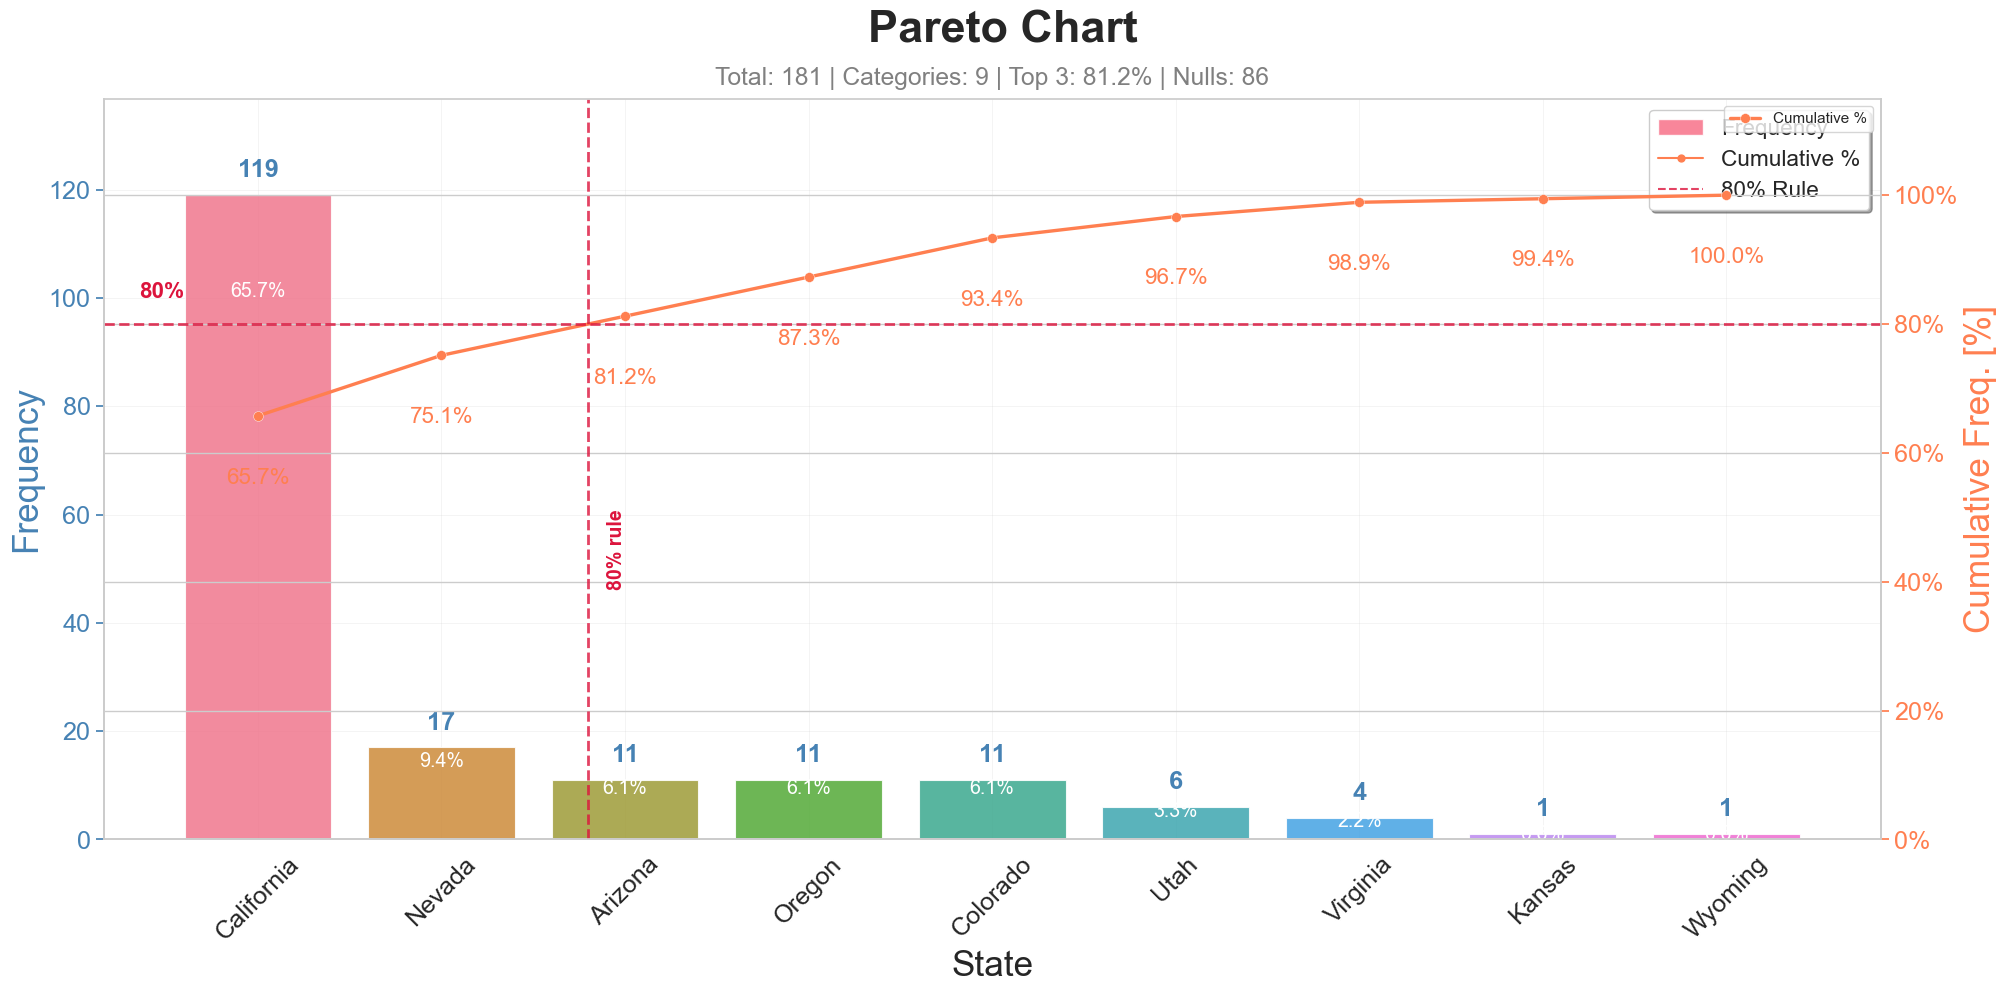

In [13]:
fig = sns_pareto2(df['State'], value_counts=True, scale=5)

In [14]:
## Al final no hice nada - la idea era que el if scaled_cumulative dejar solamente lo básico y las funciones hacerlas únicas
# me fui a hacer lo de seaborn para terminar de una vez con Pareto
def plt_pareto6(
    data: Union[pd.Series, pd.DataFrame],
    value_counts=False,
    scale: Optional[int] = 2,
    title: Optional[str] = 'Pareto Chart',
    x_label: Optional[str] = None,
    y1_label: Optional[str] = None,
    y2_label: Optional[str] = None,
    palette: Optional[list] = None,
    color1: Optional[str] = 'midnightblue',
    color2: Optional[str] = 'darkorange',
    pct_decimals: Optional[int] = 1,
    label_rotate: Optional[float] = 45,
    figsize: Optional[tuple] = None,
    fig_margin: Optional[float] = 1.1,
    show_grid: Optional[bool] = True,
    bars_alpha: Optional[float] = 0.8,
    reference_pct: Optional[float] = 80,
    reference_linewidth: float = 1,
    reference_color: str = 'red',
    reference_alpha: Optional[float] = 0.6,
    show_reference_lines: bool = True,
    scaled_cumulative: bool = False,
) -> tuple[plt.Figure, tuple[plt.Axes, plt.Axes]]:

    # Convert to serie en case of DF
    if isinstance(data, pd.DataFrame):
        data = to_series(data)

    # Validate data parameter a pandas object
    if not isinstance(data, (pd.Series, pd.DataFrame)):
        raise TypeError(
            f"Input data must be a pandas Series or DataFrame. Got {type(data)} instead."
        )
    
    # Validate and process scale parameter
    if not (1 <= scale <= 9):
        raise ValueError(f"Invalid 'scale' value. Must be between 1 and 9, got {scale}.")
    
    scale = round(scale)
    
    # Validate reference percentage
    if reference_pct is not None and not (0 < reference_pct <= 100):
        raise ValueError(f"reference_pct must be between 0 and 100, got {reference_pct}")
    
    # Validate reference linewidth
    if reference_linewidth < 0:
        raise ValueError(f"reference_linewidth must be non-negative, got {reference_linewidth}")

    # Before getting the Frequency Distribution Table get the nulls
    nulls = data.isna().sum()

    # Get de fdt. categories=fdt.index; frequencies=fdt.iloc[:, 0]; cumulative_pcts=fdt.iloc[:, -1]
    fdt = get_fdt(data, value_counts=value_counts, plain_relatives=False)

    # Calculate figure dimensions
    if figsize is None:
        multiplier = 1.33333334 ** scale
        w_base, h_base = 4.45, 2.25
        width, height = w_base * multiplier, h_base * multiplier
        figsize = (width, height)
    else:
        width, height = figsize
    
    # Calculate font sizes based on figure width
    bar_label_size = width
    axis_label_size = width * 1.25
    title_size = width * 1.57

    # Calculate cumulative_line sizes
    markersize = width * 0.3
    linewidth = width * 0.1

    # Set up colors
    if palette:
        color_palette = get_colors_list(palette, fdt.shape[0])
        color1 = color_palette[0]                                   # In this case don't consider color1 parameter
    else:
        color_palette = color1

    # Create figure and primary axis
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
    
    # Create bar plot
    bars = ax.bar(fdt.index, fdt.iloc[:, 0], 
                  color=color_palette,
                  width=0.95, 
                  alpha=bars_alpha,
                  edgecolor='white', 
                  linewidth=0.5)

    # Add value labels on bars
    ax.bar_label(bars,
                fontsize=bar_label_size,
                fontweight='bold',
                color=color1,
                label_type='edge',  # Etiqueta fuera de la barra
                padding=2)          #, rotation=90)  # opcional

    # Create secondary y-axis for cumulative percentage
    ax2 = ax.twinx()        # create another y-axis sharing a common x-axis
    
    # Calculate cumulative values
    cumulative_percentages = fdt.iloc[:, -1]            # Last column: ['Cumulative Freq. [%]']
    
    if scaled_cumulative:                               # Scaling mode fixed
        total_sum = fdt.iloc[:, 0].sum()
        
        # Convert cumulative percentages to scaled heights
        scaled_values = (cumulative_percentages / 100) * total_sum
        
        # Draw the scaled line on the main axis (x=index, y=scaled_values)
        line = ax.plot(fdt.index, scaled_values,
                       color=color2,
                       marker="D",
                       markersize=markersize,
                       linewidth=linewidth,
                       markeredgecolor='white',
                       markeredgewidth=0.2)
        
        # Adjust main axis limits to include the line
        max_freq = fdt.iloc[:, 0].max()
        max_scaled = scaled_values.max()
        # Use the maximum between the bars and the scaled line, with margin
        ax.set_ylim(0, max(max_freq, max_scaled) * fig_margin)
        
        # CORRECCIÓN: Configurar ax2 para que coincida con la escala del eje principal
        ax2.set_ylim(0, max(max_freq, max_scaled) * fig_margin)
        
        # Create custom stickers for ax2 that show percentages, corresponding to the climbed heights
        ax2_ticks = []
        ax2_labels = []
        for pct in [0, 20, 40, 60, 80, 100]:
            scaled_tick = (pct / 100) * total_sum
            if scaled_tick <= max(max_freq, max_scaled) * fig_margin:
                ax2_ticks.append(scaled_tick)
                ax2_labels.append(f'{pct}%')
        
        ax2.set_yticks(ax2_ticks)
        ax2.set_yticklabels(ax2_labels)
        
        # % point labels
        formatted_weights = [f'{x:.{pct_decimals}f}%' for x in cumulative_percentages]
        for i, txt in enumerate(formatted_weights):
            if i == 0:              # To change only % annotate of the first bar         
                distance = 0.08     # first % annotate, away from the bar
            else:
                distance = 0.025    # The others % annotates, not so far
            ax.annotate(txt,
                       (fdt.index[i], scaled_values.iloc[i] + (max(max_freq, max_scaled) * distance)),
                       color=color2,
                       fontsize=bar_label_size,
                       ha='center')
        
        # Reference lines in scaled mode
        if show_reference_lines and reference_pct is not None:
            reference_scaled_height = (reference_pct / 100) * total_sum
            
            # AXHLINE and its text
            ax.axhline(y=reference_scaled_height, color=reference_color, linestyle='--', 
                      alpha=reference_alpha, linewidth=reference_linewidth)
            
            ax.text(0.01, reference_scaled_height + (max(max_freq, max_scaled) * 0.02), 
                   f'{reference_pct}%', 
                   transform=ax.get_yaxis_transform(), 
                   color=reference_color, fontsize=bar_label_size*0.8)
            
            # AXVLINE
            cumulative_values = cumulative_percentages.values
            x_reference_percent = None
            for i, cum_pct in enumerate(cumulative_values):
                if cum_pct >= reference_pct:
                    if i == 0:
                        x_reference_percent = 0
                    else:
                        prev_pct = cumulative_values[i-1]
                        curr_pct = cumulative_values[i]
                        x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                    break
            
            if x_reference_percent is not None:
                ax.axvline(x=x_reference_percent, color=reference_color, linestyle='--', 
                          alpha=reference_alpha, linewidth=reference_linewidth)
                
                ax.text(x_reference_percent + 0.1, 
                       reference_scaled_height - (max(max_freq, max_scaled) * 0.1), 
                       f'{reference_pct}% threshold', 
                       rotation=90, color=reference_color, fontsize=bar_label_size*0.8, 
                       ha='left', va='center')
    
    else:                                           # Native scaling - original mode-
        ax2.set_ylim(0, 100 * fig_margin)
        
        line = ax2.plot(fdt.index, cumulative_percentages,
                        color=color2,
                        marker="D",
                        markersize=markersize,
                        linewidth=linewidth,
                        markeredgecolor='white',
                        markeredgewidth=0.2)
        
        ax2.yaxis.set_major_formatter(PercentFormatter())

        formatted_weights = [f'{x:.{pct_decimals}f}%' for x in cumulative_percentages]  
        for i, txt in enumerate(formatted_weights):
                ax2.annotate(txt,
                            (fdt.index[i], cumulative_percentages.iloc[i] - 6),
                            color=color2,
                            fontsize=bar_label_size,
                            ha='center')
        
        if show_reference_lines and reference_pct is not None:
            ax2.axhline(y=reference_pct, color=reference_color, linestyle='--', 
                       alpha=reference_alpha, linewidth=reference_linewidth)
            
            ax2.text(0.01, reference_pct + 3, f'{reference_pct}%', 
                        transform=ax2.get_yaxis_transform(), 
                        color=reference_color, fontsize=bar_label_size*0.8)
            
            cumulative_values = cumulative_percentages.values
            x_reference_percent = None
            for i, cum_pct in enumerate(cumulative_values):
                if cum_pct >= reference_pct:
                    if i == 0:
                        x_reference_percent = 0
                    else:
                        prev_pct = cumulative_values[i-1]
                        curr_pct = cumulative_values[i]
                        x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
                    break
            
            if x_reference_percent is not None:
                ax2.axvline(x=x_reference_percent, color=reference_color, linestyle='--', 
                           alpha=reference_alpha, linewidth=reference_linewidth)
                
                ax2.text(x_reference_percent + 0.1, reference_pct - 30, 
                         f'{reference_pct}% threshold', 
                         rotation=90, color=reference_color, fontsize=bar_label_size*0.8, 
                        ha='left', va='center')

    # Configure tick parameters
    ax.tick_params(axis='y', colors=color1, labelsize=bar_label_size)
    ax.tick_params(axis='x', rotation=label_rotate, labelsize=bar_label_size)
    ax2.tick_params(axis='y', colors=color2, labelsize=bar_label_size)

    # Set y-axis limits (for original mode)
    if not scaled_cumulative:
        max_freq = fdt.iloc[:, 0].max()
        ax.set_ylim(0, max_freq * fig_margin)

    # Add grid if requested
    if show_grid:
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)

    # Set title and labels
    if not x_label:
         x_label = fdt.index.name
    
    if not y1_label:
         y1_label = fdt.columns[0]

    if not y2_label:
         y2_label = fdt.columns[-1]

    # Apply title and labels
    fig.suptitle(title, fontsize=title_size, fontweight='bold')
    ax.set_title(f" - Nulls: {nulls} -", fontsize=axis_label_size*0.8, color=color1)
    ax.set_xlabel(x_label, fontsize=axis_label_size)
    ax.set_ylabel(y1_label, fontsize=axis_label_size, color=color1)
    ax2.set_ylabel(y2_label, fontsize=axis_label_size, color=color2)

    return fig, (ax, ax2)

## plt_pareto7
- Con alguna de las mejoras que me muestra sns_pareto2
- Pero SIN la optimización pensada para probar en pareto6
- OJO!! tenemos que poner optativa la línea vertical y/o hacer tres versiones, full . med - basic para no cargar con tanta info..
        - la reference horizontal no separa bien los vital few de los useful many.

In [15]:
def plt_pareto7(
    data: Union[pd.Series, pd.DataFrame],
    value_counts: Optional[bool] = False,
    scale: Optional[int] = 2,
    title: Optional[str] = 'Pareto Chart',
    x_label: Optional[str] = None,
    y1_label: Optional[str] = None,
    y2_label: Optional[str] = None,
    palette: Optional[list] = None,
    color1: Optional[str] = 'midnightblue',
    color2: Optional[str] = 'darkorange',
    pct_decimals: Optional[int] = 1,
    label_rotate: Optional[float] = 45,
    figsize: Optional[tuple] = None,
    fig_margin: Optional[float] = 1.1,
    show_grid: Optional[bool] = True,
    bars_alpha: Optional[float] = 0.8,
    reference_pct: Optional[float] = 80,
    reference_linewidth: float = 1,
    reference_color: str = 'red',
    reference_alpha: Optional[float] = 0.6,
    show_reference_lines: bool = True,
    scaled_cumulative: bool = False,
) -> tuple[plt.Figure, tuple[plt.Axes, plt.Axes]]:

    # Convert to serie en case of DF
    if isinstance(data, pd.DataFrame):
        data = to_series(data)

    # Validate data parameter a pandas object
    if not isinstance(data, (pd.Series, pd.DataFrame)):
        raise TypeError(
            f"Input data must be a pandas Series or DataFrame. Got {type(data)} instead."
        )
    
    # Validate and process scale parameter
    if not (1 <= scale <= 9):
        raise ValueError(f"Invalid 'scale' value. Must be between 1 and 9, got {scale}.")
    
    scale = round(scale)
    
    # Validate reference percentage
    if reference_pct is not None and not (0 < reference_pct <= 100):
        raise ValueError(f"reference_pct must be between 0 and 100, got {reference_pct}")
    
    # Validate reference linewidth
    if reference_linewidth < 0:
        raise ValueError(f"reference_linewidth must be non-negative, got {reference_linewidth}")

    # Before getting the Frequency Distribution Table get the nulls
    nulls = data.isna().sum()

    # Get de fdt. categories=fdt.index; frequencies=fdt.iloc[:, 0]; relative_pcts=fdt.iloc[:, -2]; cumulative_pcts=fdt.iloc[:, -1]
    fdt = get_fdt(data, value_counts=value_counts, plain_relatives=False)

    # Calculate figure dimensions
    if figsize is None:
        multiplier = 1.33333334 ** scale
        w_base, h_base = 4.45, 2.25
        width, height = w_base * multiplier, h_base * multiplier
        figsize = (width, height)
    else:
        width, height = figsize
    
    # Calculate font sizes based on figure width
    bar_label_size = width
    axis_label_size = width * 1.25
    title_size = width * 1.57

    # Calculate cumulative_line sizes
    markersize = width * 0.3
    linewidth = width * 0.1

    # Set up colors
    if palette:
        color_palette = get_colors_list(palette, fdt.shape[0])
        color1 = color_palette[0]                                   # In this case don't consider color1 parameter
    else:
        color_palette = color1

    # Create figure and primary axis
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
    
    # Create bar plot
    bars = ax.bar(fdt.index, fdt.iloc[:, 0], 
                  color=color_palette,
                  width=0.95, 
                  alpha=bars_alpha,
                  edgecolor='white', 
                  linewidth=0.5)

    # Add value labels on bars
    labels = [f"[{fdt.iloc[ix, 0]}]  {fdt.iloc[ix, -2]:.1f} %" for ix in range(fdt.shape[0])]
    ax.bar_label(bars,
                labels=labels,
                fontsize=bar_label_size * 0.9,
                fontweight='bold',
                color=color1,
                label_type='edge',  # Etiqueta fuera de la barra
                padding=2)          #, rotation=90)  # opcional

    # Create secondary y-axis for cumulative percentage
    ax2 = ax.twinx()        # create another y-axis sharing a common x-axis
    
    # Calculate cumulative values
    cumulative_percentages = fdt.iloc[:, -1]            # Last column: ['Cumulative Freq. [%]']
    
    if scaled_cumulative:                               # Scaling mode fixed
        total_sum = fdt.iloc[:, 0].sum()
        
        # Convert cumulative percentages to scaled heightsdas
        scaled_values = (cumulative_percentages / 100) * total_sum
        
        # Draw the scaled line on the main axis (x=index, y=scaled_values)
        line = ax.plot(fdt.index, scaled_values,
                       color=color2,
                       marker="D",
                       markersize=markersize,
                       linewidth=linewidth,
                       markeredgecolor='white',
                       markeredgewidth=0.2)
        
        # Adjust main axis limits to include the line
        max_freq = fdt.iloc[:, 0].max()
        max_scaled = scaled_values.max()
        # Use the maximum between the bars and the scaled line, with margin
        ax.set_ylim(0, max(max_freq, max_scaled) * fig_margin)
        
        # CORRECCIÓN: Configurar ax2 para que coincida con la escala del eje principal
        ax2.set_ylim(0, max(max_freq, max_scaled) * fig_margin)
        
        # Create custom stickers for ax2 that show percentages, corresponding to the climbed heights
        ax2_ticks = []
        ax2_labels = []
        for pct in [0, 20, 40, 60, 80, 100]:
            scaled_tick = (pct / 100) * total_sum
            if scaled_tick <= max(max_freq, max_scaled) * fig_margin:
                ax2_ticks.append(scaled_tick)
                ax2_labels.append(f'{pct}%')
        
        ax2.set_yticks(ax2_ticks)
        ax2.set_yticklabels(ax2_labels)
        
        # % point labels
        formatted_weights = [f'{x:.{pct_decimals}f}%' for x in cumulative_percentages]
        for i, txt in enumerate(formatted_weights):
            if i == 0:              # To change only % annotate of the first bar         
                distance = 0.08     # first % annotate, away from the bar
            else:
                distance = 0.025    # The others % annotates, not so far
            ax.annotate(txt,
                       (fdt.index[i], scaled_values.iloc[i] + (max(max_freq, max_scaled) * distance)),
                       color=color2,
                       fontsize=bar_label_size,
                       ha='center')
        
        # Reference lines in scaled mode
        if show_reference_lines and reference_pct is not None:
            reference_scaled_height = (reference_pct / 100) * total_sum
            
            # AXHLINE and its text
            ax.axhline(y=reference_scaled_height, color=reference_color, linestyle='--', 
                      alpha=reference_alpha, linewidth=reference_linewidth)
            
            ax.text(0.01, reference_scaled_height + (max(max_freq, max_scaled) * 0.02), 
                   f'{reference_pct}%', 
                   transform=ax.get_yaxis_transform(), 
                   color=reference_color, fontsize=bar_label_size*0.8)
            
            # AXVLINE - Para el FUTURO ya que hay que analizar la 'utilidad' de esta línea horizontal porque al final la visualización 
            # de esta línea horizontal no es clara
            # -----------------------------------------------------------------------------------------------------------------------
            # cumulative_values = cumulative_percentages.values
            # x_reference_percent = None
            # for i, cum_pct in enumerate(cumulative_values):
            #     if cum_pct >= reference_pct:
            #         if i == 0:
            #             x_reference_percent = 0
            #         else:
            #             prev_pct = cumulative_values[i-1]
            #             curr_pct = cumulative_values[i]
            #             x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
            #         break
            
            # if x_reference_percent is not None:
            #     ax.axvline(x=x_reference_percent, color=reference_color, linestyle='--', 
            #               alpha=reference_alpha, linewidth=reference_linewidth)
                
            #     ax.text(x_reference_percent + 0.1, 
            #            reference_scaled_height - (max(max_freq, max_scaled) * 0.1), 
            #            f'{reference_pct}% threshold', 
            #            rotation=90, color=reference_color, fontsize=bar_label_size*0.8, 
            #            ha='left', va='center')
    
    else:                                           # Native scaling
        ax2.set_ylim(0, 100 * fig_margin)
        
        line = ax2.plot(fdt.index, cumulative_percentages,
                        color=color2,
                        marker="D",
                        markersize=markersize,
                        linewidth=linewidth,
                        markeredgecolor='white',
                        markeredgewidth=0.2)
        
        ax2.yaxis.set_major_formatter(PercentFormatter())

        formatted_weights = [f'{x:.{pct_decimals}f}%' for x in cumulative_percentages]  
        for i, txt in enumerate(formatted_weights):
                ax2.annotate(txt,
                            (fdt.index[i], cumulative_percentages.iloc[i] - 6),
                            color=color2,
                            fontsize=bar_label_size,
                            ha='center')
        
        if show_reference_lines and reference_pct is not None:
            ax2.axhline(y=reference_pct, color=reference_color, linestyle='--', 
                       alpha=reference_alpha, linewidth=reference_linewidth)
            
            ax2.text(0.01, reference_pct + 3, f'{reference_pct}%', 
                        transform=ax2.get_yaxis_transform(), 
                        color=reference_color, fontsize=bar_label_size*0.8)
            # AXVLINE - Para el FUTURO ya que hay que analizar la 'utilidad' de esta línea horizontal porque al final la visualización 
            # de esta línea horizontal no es clara
            # -----------------------------------------------------------------------------------------------------------------------
            # cumulative_values = cumulative_percentages.values
            # x_reference_percent = None
            # for i, cum_pct in enumerate(cumulative_values):
            #     if cum_pct >= reference_pct:
            #         if i == 0:
            #             x_reference_percent = 0
            #         else:
            #             prev_pct = cumulative_values[i-1]
            #             curr_pct = cumulative_values[i]
            #             x_reference_percent = (i-1) + (reference_pct - prev_pct) / (curr_pct - prev_pct)
            #         break
            
            # if x_reference_percent is not None:
            #     ax2.axvline(x=x_reference_percent, color=reference_color, linestyle='--', 
            #                alpha=reference_alpha, linewidth=reference_linewidth)
                
            #     ax2.text(x_reference_percent + 0.1, reference_pct - 30, 
            #              f'{reference_pct}% threshold', 
            #              rotation=90, color=reference_color, fontsize=bar_label_size*0.8, 
            #             ha='left', va='center')

    # Configure tick parameters
    ax.tick_params(axis='y', colors=color1, labelsize=bar_label_size)
    ax.tick_params(axis='x', rotation=label_rotate, labelsize=bar_label_size)
    ax2.tick_params(axis='y', colors=color2, labelsize=bar_label_size)

    # Set y-axis limits (solo para modo original)
    if not scaled_cumulative:
        max_freq = fdt.iloc[:, 0].max()
        ax.set_ylim(0, max_freq * fig_margin)

    # Add grid if requested
    if show_grid:
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)

    # Set title and labels
    if not x_label:
         x_label = fdt.index.name
    
    if not y1_label:
         y1_label = fdt.columns[0]

    if not y2_label:
         y2_label = fdt.columns[-1]

    # Enhanced subtitle with statistics
    total_items = fdt.iloc[:, 0].sum()      # frequencies.sum()
    n_categories = len(fdt.index)           # len(categories)
    top_3_pct = cumulative_percentages.iloc[min(2, len(cumulative_percentages)-1)]      # if len(cum_pcts) < 2
    subtitle = f"Total without nulls: {total_items:,} | Categories: {n_categories} | Top 3: {top_3_pct:.1f}% | Nulls: {nulls}"

    # Apply title and labels
    fig.suptitle(title, fontsize=title_size, fontweight='bold')
    ax.set_title(subtitle, fontsize=axis_label_size*0.8, color=color1, pad=10)
    ax.set_xlabel(x_label, fontsize=axis_label_size, fontweight='medium')
    ax.set_ylabel(y1_label, fontsize=axis_label_size, color=color1, fontweight='medium')
    ax2.set_ylabel(y2_label, fontsize=axis_label_size, color=color2, fontweight='medium')

    return fig, (ax, ax2)

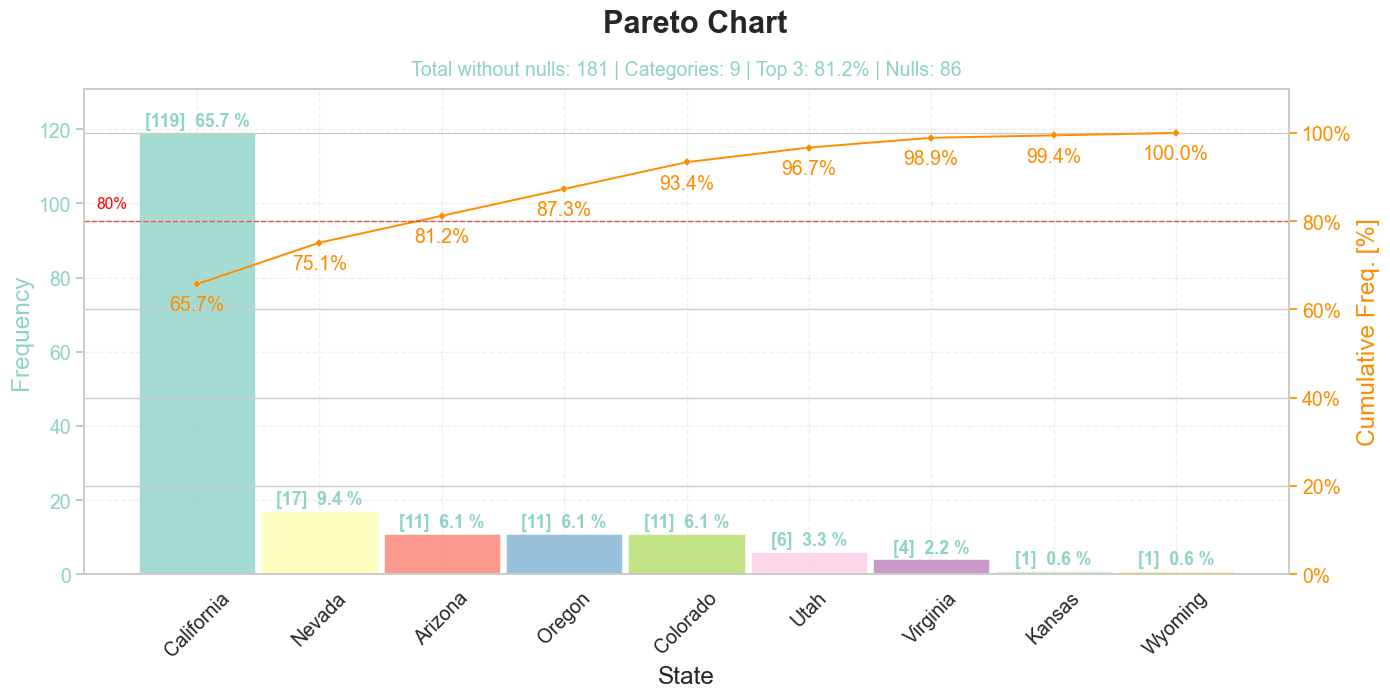

In [16]:
fig = plt_pareto7(df['State'], value_counts=True, scale=4, scaled_cumulative=False, palette='set3')

In [17]:
fdt_2 = get_fdt(df['State'], value_counts=True)    
cumulative_pcts = fdt_2['Cumulative Freq. [%]']
top_3_pct = cumulative_pcts.iloc[min(2, len(cumulative_pcts)-1)]

labels = [f"{fdt_2.iloc[ix, 0]} ({fdt_2.iloc[ix, -2]:.1f} %)" for ix in range(fdt_2.shape[0])]
print(labels)

for iloc_ix in range(len(cumulative_pcts)):
    print(f"cumulative_pcts.iloc[{iloc_ix}] = {cumulative_pcts.iloc[iloc_ix]}")

display(len(cumulative_pcts))
display(top_3_pct)
fdt_2

['119 (65.7 %)', '17 (9.4 %)', '11 (6.1 %)', '11 (6.1 %)', '11 (6.1 %)', '6 (3.3 %)', '4 (2.2 %)', '1 (0.6 %)', '1 (0.6 %)']
cumulative_pcts.iloc[0] = 65.74585635359117
cumulative_pcts.iloc[1] = 75.13812154696133
cumulative_pcts.iloc[2] = 81.21546961325966
cumulative_pcts.iloc[3] = 87.292817679558
cumulative_pcts.iloc[4] = 93.37016574585634
cumulative_pcts.iloc[5] = 96.68508287292816
cumulative_pcts.iloc[6] = 98.89502762430938
cumulative_pcts.iloc[7] = 99.44751381215468
cumulative_pcts.iloc[8] = 99.99999999999997


9

np.float64(81.21546961325966)

,Frequency,Cumulative Frequency,Relative Frequency,Cumulative Relative Freq.,Relative Freq. [%],Cumulative Freq. [%]
State,,,,,,
California,119,119,0.657459,0.657459,65.745856,65.745856
Nevada,17,136,0.093923,0.751381,9.392265,75.138122
Arizona,11,147,0.060773,0.812155,6.077348,81.215470
Oregon,11,158,0.060773,0.872928,6.077348,87.292818
Colorado,11,169,0.060773,0.933702,6.077348,93.370166
Utah,6,175,0.033149,0.966851,3.314917,96.685083
Virginia,4,179,0.022099,0.988950,2.209945,98.895028
Kansas,1,180,0.005525,0.994475,0.552486,99.447514
Wyoming,1,181,0.005525,1.000000,0.552486,100.000000


In [18]:
def plt_pareto8(
    data: Union[pd.Series, pd.DataFrame],
    value_counts: Optional[bool] = False,
    scale: Optional[int] = 1,
    title: Optional[str] = 'Pareto Chart',
    x_label: Optional[str] = None,
    y1_label: Optional[str] = None,
    y2_label: Optional[str] = None,
    palette: Optional[list] = None,
    color1: Optional[str] = 'midnightblue',
    color2: Optional[str] = 'darkorange',
    pct_decimals: Optional[int] = 1,
    label_rotate: Optional[float] = 45,
    figsize: Optional[tuple] = None,
    fig_margin: Optional[float] = 1.1,
    show_grid: Optional[bool] = True,
    bars_alpha: Optional[float] = 0.8,
    reference_pct: Optional[float] = 80,
    reference_linewidth: float = 1,
    reference_color: str = 'red',
    reference_alpha: Optional[float] = 0.6,
    show_reference_lines: bool = True,
    scaled_cumulative: bool = True,
) -> tuple[plt.Figure, tuple[plt.Axes, plt.Axes]]:

    # Convert to serie en case of DF
    if isinstance(data, pd.DataFrame):
        data = to_series(data)

    # Validate data parameter a pandas object
    if not isinstance(data, (pd.Series, pd.DataFrame)):
        raise TypeError(
            f"Input data must be a pandas Series or DataFrame. Got {type(data)} instead."
        )
    
    # Validate and process scale parameter
    if not (1 <= scale <= 9):
        raise ValueError(f"Invalid 'scale' value. Must be between 1 and 9, got {scale}.")
    
    scale = round(scale)
    
    # Validate reference percentage
    if reference_pct is not None and not (0 < reference_pct <= 100):
        raise ValueError(f"reference_pct must be between 0 and 100, got {reference_pct}")
    
    # Validate reference linewidth
    if reference_linewidth < 0:
        raise ValueError(f"reference_linewidth must be non-negative, got {reference_linewidth}")

    # Before getting the Frequency Distribution Table get the nulls
    nulls = data.isna().sum()

    # Get de fdt. categories=fdt.index; frequencies=fdt.iloc[:, 0]; relative_pcts=fdt.iloc[:, -2]; cumulative_pcts=fdt.iloc[:, -1]
    fdt = get_fdt(data, value_counts=value_counts, plain_relatives=False)

    # Calculate figure dimensions
    if figsize is None:
        multiplier = scale + 7
        w_base, h_base = 1, 0.56
        width, height = w_base * multiplier, h_base * multiplier
        figsize = (width, height)
    else:
        width, height = figsize
    
    # Calculate font sizes based on figure width
    bar_label_size = width
    axis_label_size = width * 1.25
    title_size = width * 1.57

    # Calculate cumulative_line sizes
    markersize = width * 0.4
    linewidth = width * 0.12

    # Set up colors
    if palette:
        color_palette = get_colors_list(palette, fdt.shape[0])
        color1 = color_palette[0]                                   # In this case don't consider color1 parameter
    else:
        color_palette = color1

    # Create figure and primary axis
    fig, ax = plt.subplots(figsize=figsize, tight_layout=True)
    
    # Create bar plot
    bars = ax.bar(fdt.index, fdt.iloc[:, 0], 
                  color=color_palette,
                  width=0.7, 
                  alpha=bars_alpha,
                  edgecolor='white', 
                  linewidth=0.5)

    # Add value labels on bars
    labels = [f"{fdt.iloc[ix, 0]} | {fdt.iloc[ix, -2]:.1f} %" for ix in range(fdt.shape[0])]
    ax.bar_label(bars,
                labels=labels,
                fontsize=bar_label_size * 0.9,
                fontweight='bold',
                color=color1,
                label_type='edge',  # Etiqueta fuera de la barra
                padding=2)          #, rotation=90)  # opcional

    # Create secondary y-axis for cumulative percentage
    ax2 = ax.twinx()        # create another y-axis sharing a common x-axis
    
    # Calculate cumulative values
    cumulative_percentages = fdt.iloc[:, -1]            # Last column: ['Cumulative Freq. [%]']
    
    if scaled_cumulative:                               # Scaling mode fixed
        total_sum = fdt.iloc[:, 0].sum()
        
        # Convert cumulative percentages to scaled heightsdas
        scaled_values = (cumulative_percentages / 100) * total_sum
        
        # Draw the scaled line on the main axis (x=index, y=scaled_values)
        line = ax.plot(fdt.index, scaled_values,
                       color=color2,
                       marker="D",
                       markersize=markersize,
                       linewidth=linewidth,
                       markeredgecolor='white',
                       markeredgewidth=0.2)
        
        # Adjust main axis limits to include the line
        max_freq = fdt.iloc[:, 0].max()
        max_scaled = scaled_values.max()
        # Use the maximum between the bars and the scaled line, with margin
        ax.set_ylim(0, max(max_freq, max_scaled) * fig_margin)
        
        # CORRECCIÓN: Configurar ax2 para que coincida con la escala del eje principal
        ax2.set_ylim(0, max(max_freq, max_scaled) * fig_margin)
        
        # Create custom stickers for ax2 that show percentages, corresponding to the climbed heights
        ax2_ticks = []
        ax2_labels = []
        for pct in [0, 20, 40, 60, 80, 100]:
            scaled_tick = (pct / 100) * total_sum
            if scaled_tick <= max(max_freq, max_scaled) * fig_margin:
                ax2_ticks.append(scaled_tick)
                ax2_labels.append(f'{pct}%')
        
        ax2.set_yticks(ax2_ticks)
        ax2.set_yticklabels(ax2_labels)
        
        # % point labels
        formatted_weights = [f'{x:.{pct_decimals}f}%' for x in cumulative_percentages]
        for i, txt in enumerate(formatted_weights):
            if i == 0:              # To change only % annotate of the first bar         
                distance = 0.08     # first % annotate, away from the bar
            else:
                distance = 0.025    # The others % annotates, not so far
            ax.annotate(txt,
                       (fdt.index[i], scaled_values.iloc[i] + (max(max_freq, max_scaled) * distance)),
                       color=color2,
                       fontsize=bar_label_size,
                       ha='center')
        
        # Reference lines in scaled mode
        if show_reference_lines and reference_pct is not None:
            reference_scaled_height = (reference_pct / 100) * total_sum
            
            # AXHLINE and its text
            ax.axhline(y=reference_scaled_height, color=reference_color, linestyle='--', 
                      alpha=reference_alpha, linewidth=reference_linewidth)
            
            ax.text(0.01, reference_scaled_height + (max(max_freq, max_scaled) * 0.02), 
                   f'{reference_pct}%', 
                   transform=ax.get_yaxis_transform(), 
                   color=reference_color, fontsize=bar_label_size*0.8)
    
    else:                                           # Native scaling
        ax2.set_ylim(0, 100 * fig_margin)
        
        line = ax2.plot(fdt.index, cumulative_percentages,
                        color=color2,
                        marker="D",
                        markersize=markersize,
                        linewidth=linewidth,
                        markeredgecolor='white',
                        markeredgewidth=0.2)
        
        ax2.yaxis.set_major_formatter(PercentFormatter())

        formatted_weights = [f'{x:.{pct_decimals}f}%' for x in cumulative_percentages]  
        for i, txt in enumerate(formatted_weights):
                ax2.annotate(txt,
                            (fdt.index[i], cumulative_percentages.iloc[i] - 7),
                            color=color2,
                            fontsize=bar_label_size,
                            fontweight='bold',
                            ha='center')
        
        if show_reference_lines and reference_pct is not None:
            ax2.axhline(y=reference_pct, color=reference_color, linestyle='--', 
                       alpha=reference_alpha, linewidth=reference_linewidth)
            
            ax2.text(0.01, reference_pct + 3, f'{reference_pct}%', 
                        transform=ax2.get_yaxis_transform(), 
                        color=reference_color, fontsize=bar_label_size*0.8)

    # Configure tick parameters
    ax.tick_params(axis='y', colors=color1, labelsize=bar_label_size)
    ax.tick_params(axis='x', rotation=label_rotate, labelsize=bar_label_size)
    ax2.tick_params(axis='y', colors=color2, labelsize=bar_label_size)

    # Set y-axis limits (solo para modo original)
    if not scaled_cumulative:
        max_freq = fdt.iloc[:, 0].max()
        ax.set_ylim(0, max_freq * fig_margin)

    # Add grid if requested
    if show_grid:
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)

    # Set title and labels
    if not x_label:
         x_label = fdt.index.name
    
    if not y1_label:
         y1_label = fdt.columns[0]

    if not y2_label:
         y2_label = fdt.columns[-1]

    # Enhanced subtitle with statistics
    total_items = fdt.iloc[:, 0].sum()      # frequencies.sum()
    n_categories = len(fdt.index)           # len(categories)
    top_3_pct = cumulative_percentages.iloc[min(2, len(cumulative_percentages)-1)]      # if len(cum_pcts) < 2
    subtitle = f"Total without nulls: {total_items:,} | Categories: {n_categories} | Top 3: {top_3_pct:.1f}% | Nulls: {nulls}"

    # Apply title and labels
    fig.suptitle(title, fontsize=title_size, fontweight='bold')
    ax.set_title(subtitle, fontsize=axis_label_size*0.8, color=color1, pad=10)
    ax.set_xlabel(x_label, fontsize=axis_label_size, fontweight='medium')
    ax.set_ylabel(y1_label, fontsize=axis_label_size, color=color1, fontweight='medium')
    ax2.set_ylabel(y2_label, fontsize=axis_label_size, color=color2, fontweight='medium')

    return fig, (ax, ax2)

In [19]:
# df.columns
# print(1/0.56)
# 16/9

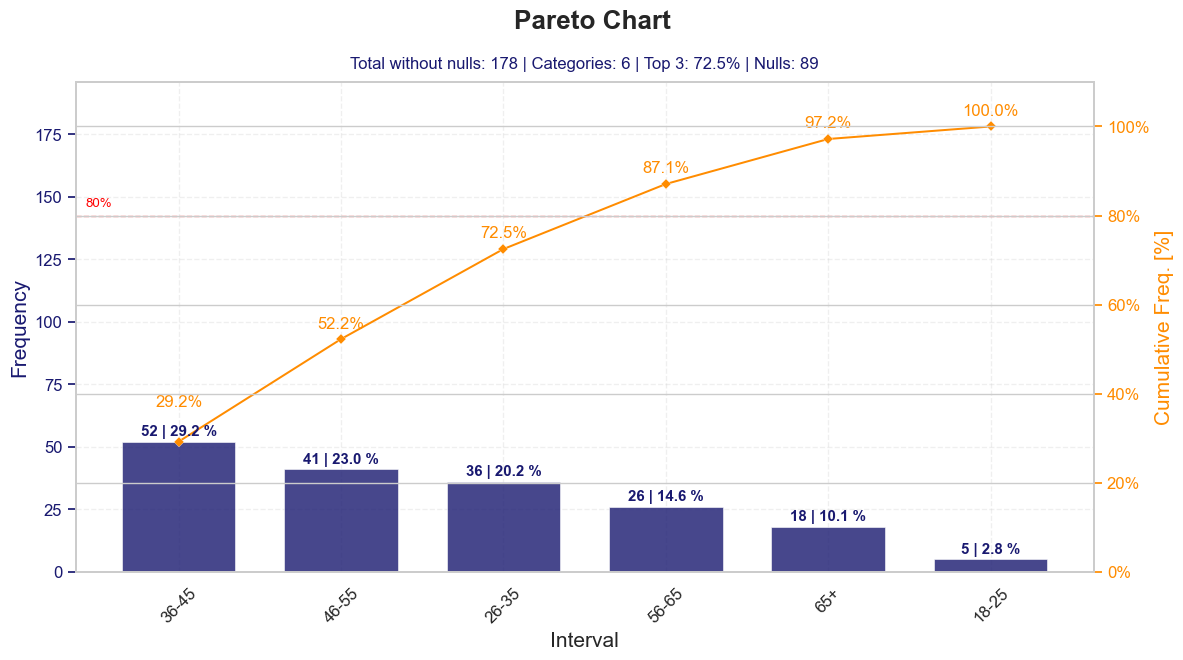

In [20]:
fig = plt_pareto8(df['Interval'], value_counts=True, scale=5)